<h1 style="text-align:center;color:blue;font-size:50px;font-family:ALGERIAN;border:solid">Projet de Machine Learning</h1>

<h1 style="text-align:center;color:blue;font-size:50px;font-family:times">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE)</h1><br>

<div style="display:flex;text-align:justify">
    
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:60%"> 
<span style="font-weight:bold">Réalisé par : </span> 
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle"> 
        <li>Komla Alex LABOU</li>                                      
        <li>Dieynaba KA</li>
        <li>S. D. E. Laurine ADOGOUN</li>                                      
        <li>Moussa DIAKITE</li>
    </ul>
    <span style="font-style: italic;font-size:13px">Élèves Ingénieurs Statisticiens Economistes</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de :</li> 
 <li>Mme. Mously DIAW</li>                                     
   
</ul>
    
</div>   

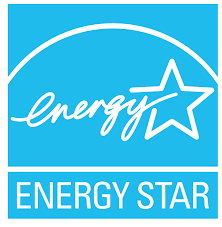

<h2 style="text-align:justify;color:blue;font-size:30px;font-family:ALGERIAN">I. PRELIMINAIRE</h2>

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia"> A. Définition de l'environnement de travail</h3>

In [606]:
from pathlib import Path

# définir le répertoire du projet contenant le dossier data/ et notebooks/
HOME = Path.cwd().parent
print(f"Home directory: {HOME}")

# définir le répertoire des données
DATA = Path(HOME, "Data1")
print(f"Data directory: {DATA}")

Home directory: C:\Users\DELL\Desktop\ISE2\Semestre1\Machine_learning1\Projet_ML
Data directory: C:\Users\DELL\Desktop\ISE2\Semestre1\Machine_learning1\Projet_ML\Data1


<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">B. Importation des packages</h3>

In [607]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.impute import KNNImputer
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot

<h2 style="text-align:justify;color:blue;font-size:30px;font-family:ALGERIAN">II. PREPOCESSING</h2>

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">A. Informations sur la base de données</h3>

In [608]:
data = pd.read_csv(Path(DATA, "2016_Building_Energy_Benchmarking_20240127.csv"), sep=",")
data.shape

(3376, 46)

In [609]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

<p style="font-family:times;font-size:15px">
    Dans le cadre de ce travail, nous nous intéressons juste aux batiments non destinés à l'habitation. Nous allons donc effectuer une restriction sur la base de données à partir de la variable 'BuildingType'. Les modalités retenues comme batiment non résidentiel sont : <b>'Nonresidential WA', 'SPS-District K-12', 'Campus', 'NonResidential', 'Nonresidential COS'</b> </p>

In [610]:
fil_data = data[data['BuildingType'].isin(['Nonresidential WA', 'SPS-District K-12', 'Campus', 'NonResidential', 'Nonresidential COS'])]
print(fil_data['BuildingType'].unique())
print('Dimensions de la base filtrée : ',fil_data.shape)

['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']
Dimensions de la base filtrée :  (1668, 46)


<p style="font-family:times;font-size:15px">
   Nous avons à présent une base constituée de <b>1668</b> batiments avec <b>46</b> variables par rapport à ceux là. </p>

In [611]:
fil_data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [612]:
fil_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   DataYear                         1668 non-null   int64  
 2   BuildingType                     1668 non-null   object 
 3   PrimaryPropertyType              1668 non-null   object 
 4   PropertyName                     1668 non-null   object 
 5   Address                          1668 non-null   object 
 6   City                             1668 non-null   object 
 7   State                            1668 non-null   object 
 8   ZipCode                          1652 non-null   float64
 9   TaxParcelIdentificationNumber    1668 non-null   object 
 10  CouncilDistrictCode              1668 non-null   int64  
 11  Neighborhood                     1668 non-null   object 
 12  Latitude            

<p style="font-family:times;font-size:15px">
   La variable Comments étant totalement vide elle sera supprimée pour les analyses ultérieures.</p>

<p style="font-family:times;font-size:15px">
   Voyons à présent si notre base présente des doublons </p>

In [613]:
print('Nombre de doublons détecté : ',fil_data.duplicated().sum())

Nombre de doublons détecté :  0


<p style="font-family:times;font-size:15px">
   <b>Aucun doublon n'a été detecté dans notre base de données</b></p>

In [614]:
# Generate descriptive statistics
fil_data.describe('')

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.0,1652.000000,1668.000000,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,...,1.666000e+03,1.665000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,0.0,1666.000000,1666.000000
mean,16336.346523,2016.0,98116.819613,4.356715,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,...,8.437933e+06,8.064790e+06,5.125726e+05,1.712630e+06,5.843493e+06,1.970845e+04,1.970845e+06,NaN,184.973301,1.607845
std,13835.292512,0.0,18.430353,2.191048,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,...,3.024380e+07,2.203878e+07,5.513944e+06,6.095172e+06,2.079673e+07,9.370814e+04,9.370814e+06,NaN,751.976001,2.336882
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
50%,21143.500000,2016.0,98109.000000,4.000000,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,...,2.554947e+06,2.685146e+06,0.000000e+00,4.724153e+05,1.611881e+06,4.982630e+03,4.982630e+05,NaN,49.580000,0.880000
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">B. Détection des données manquantes</h3>

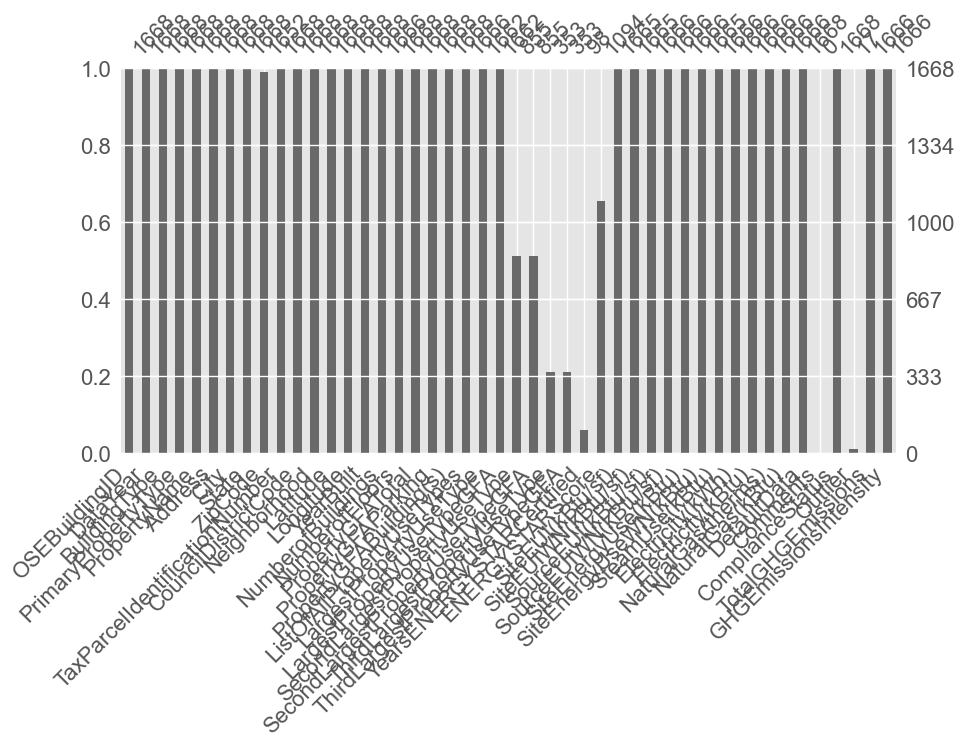

In [615]:
# Graphique à barres visualisant la nullité du DataFrame
msno.bar(fil_data, figsize=(10, 5));

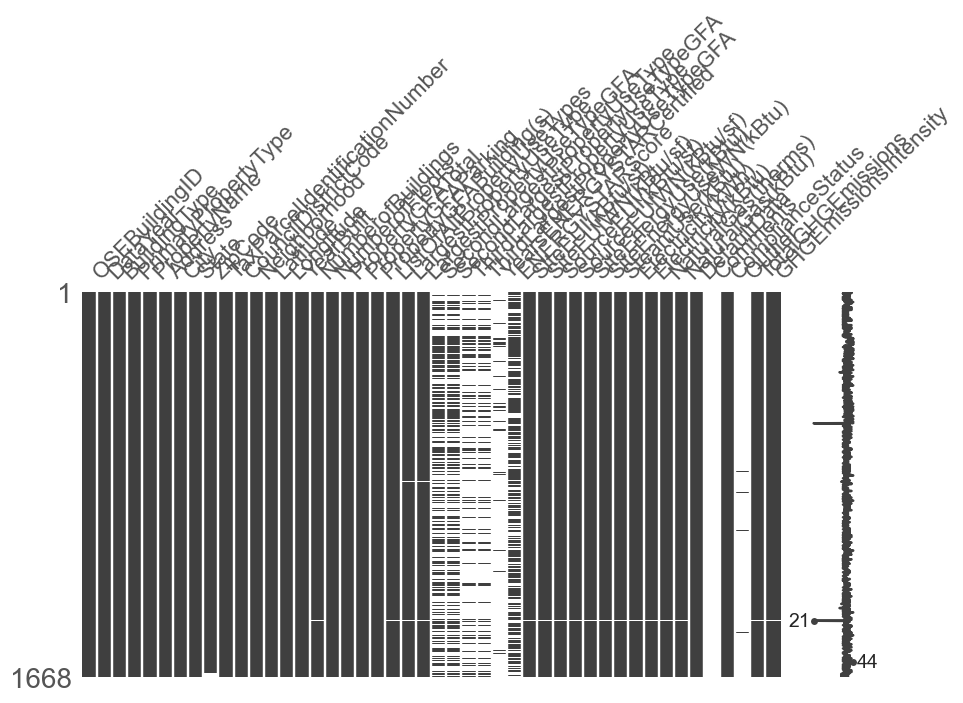

In [616]:
# Visualisation matricielle de la nullité du DataFrame donné (permettant de repérer des tendances dans le remplissage des données)
msno.matrix(fil_data, figsize=(10, 5));

In [617]:
pip install pivottablejs

Note: you may need to restart the kernel to use updated packages.


In [618]:
from pivottablejs import pivot_ui
pivot_ui(fil_data)

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">C. Traitement des données</h3>

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">1. Variable à supprimer</h4>

<p style="font-family:times;font-size:15px"> Toutes les variables dans notre base ne nous servirons pas dans notre travail. Ici, nous identifions quelques-unes à supprimer avant de continuer l'analyse descriptive pour voir s'il y en a d'autres également à supprimer.  Ainsi voici justification à l'appui les variables dédidées à être supprimer pour commencer:</p>
<ul style="font-family:times;font-size:15px;list-style-type:circle"> 
    <ul style="font-family:times;font-size:15px;list-style-type:circle"> 
        <li style= "font-weight:bold"> Les variables ayant juste une seule modalité : </li>  <p style="font-family:times;font-size:15px"> Parce qu'elles sont constantes pour toutes les modalités et ne déterminent pas à priori à la variable cible.</p>                                   
        <li style= "font-weight:bold">Les variables ayant un taux de valeur manquante très élevé </li>
        <li style= "font-weight:bold"> La variable ZipCode (Code postal)</li>     <p style="font-family:times;font-size:15px"> Parce qu'elle n'est pas intéressante dans le cadre de notre travail. L'information qu'elle pourrait apporter quant à la localisation des constructions peut être capter grâce à d'autres variables telle que le quartier.</p>                                 
        <li style= "font-weight:bold"> Les variables longitude et latitude : </li>  <p style="font-family:times;font-size:15px"> Elles n'indiquent que la position du batiment et sont propre à chaque batiment. </p>
        <li style= "font-weight:bold"> Les variables Address, Nom de la propriété, Numéro d'identification de la parcelle : </li>  <p style="font-family:times;font-size:15px"> Elles sont des caractéristiques spécifiques à quasiment chaque batiment, elles sont donc très hétérogènes. </p>
        <li style= "font-weight:bold"> Les variables Electicity(kwh) et NaturalGas(therms) : </li>  <p style="font-family:times;font-size:15px"> L'information fournit par ces deux variables est obtenue à partir des variables Electicity(kBtu) et NaturalGas(kBtu). On préfère alors garder ces deux dernières pour uniformiser l'unité d'énergie considérée (kBtu). </p>
    </ul>
</ul>

<h5 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">a. Variables à une modalité</h5>

In [619]:
# Variable ayant une modalité
single_modal_vars = fil_data.apply(lambda col: col.nunique() == 1)

# Extraire les noms des colonnes avec une seule modalité
single_modal_vars = single_modal_vars[single_modal_vars].index.tolist()

print("Variables avec une seule modalité :")
print(single_modal_vars)

Variables avec une seule modalité :
['DataYear', 'City', 'State']


<h5 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">b. Variables à taux de NA élevé</h5>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


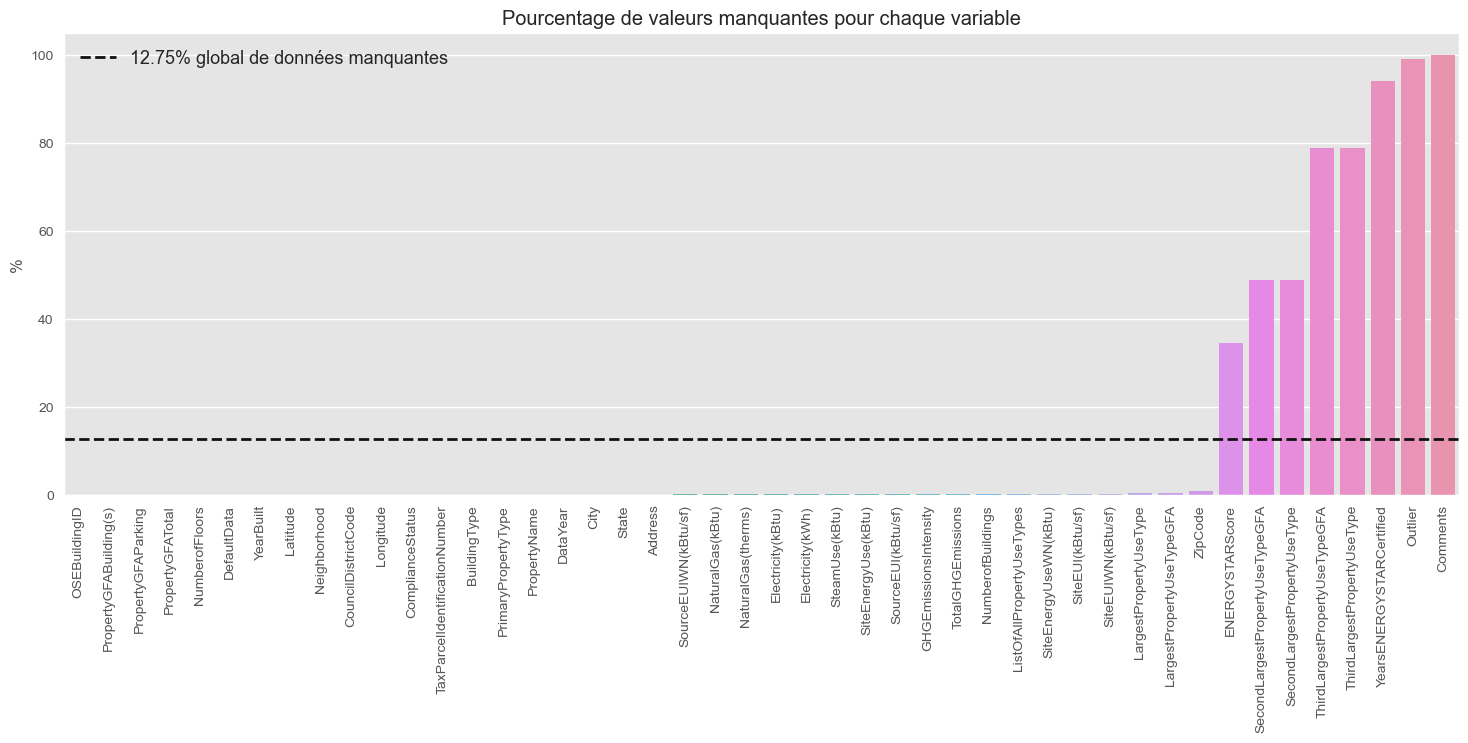

In [620]:
fig = plt.figure(figsize=(18, 6))

null_prop = fil_data.isnull().sum(axis=0).sum()/len(fil_data)/len(fil_data.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

null = fil_data.isnull().sum(axis=0).sort_values()/len(fil_data)*100
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()

<p style="font-family:times;font-size:15px"> On remarque que les variables renseignant sur le type d'usage et la surface des seconde et troisième plus grands usages des propriétés utiisés ont des taux de NA assez élevés, dépassant même la moitié. Cependant ces NA sont légitimes car elles correpondent aux batiments n'ayant qu'un seul usage possible. Nous les garderons dans notre analyse en recodant les NA par la modalité <b>Not Concerned</b> et les valeurs manquantes des superificies par <b>0</b></p>

<p style="font-family:times;font-size:15px"> La variable <b>Comments</b> quant à elle a toutes ses valeurs manquantes donc sera supprimées de même que la variable <b>Outlier</b>. </p>

In [621]:
# Remplacement des NA de SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType et ThirdLargestPropertyUseTypeGFA

fil_data["SecondLargestPropertyUseType"].fillna("Not Concerned", inplace=True)
fil_data["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
fil_data["ThirdLargestPropertyUseType"].fillna("Not Concerned", inplace=True)
fil_data["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21076\3093717089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data["SecondLargestPropertyUseType"].fillna("Not Concerned", inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21076\3093717089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21076\3093717089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [622]:
# Création d'un DataFrame contenant la proportion de valeurs manquantes par variable
df = fil_data.isnull().sum()*100/len(fil_data)
df

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.959233
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.119904
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.119904
LargestPropertyUseType            

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


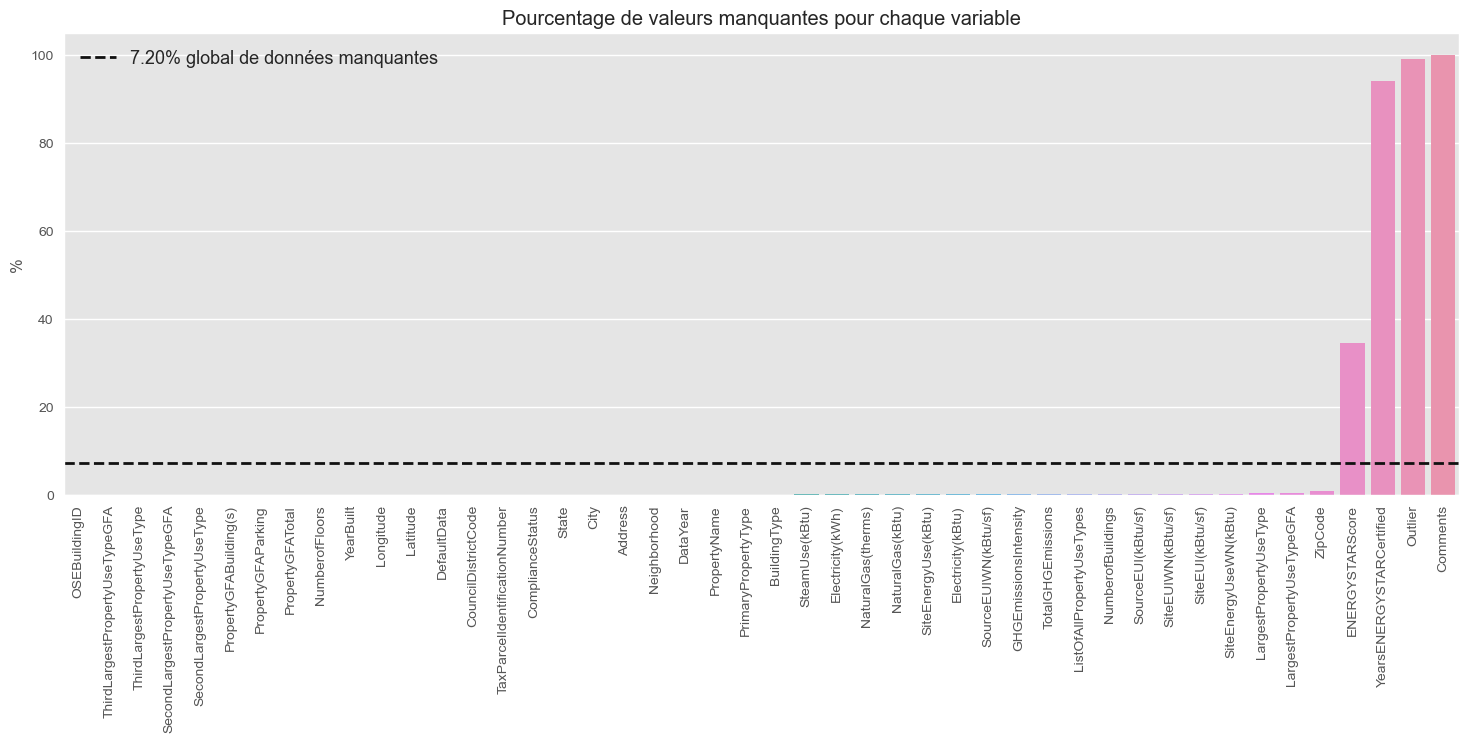

In [623]:
fig = plt.figure(figsize=(18, 6))

null_prop = fil_data.isnull().sum(axis=0).sum()/len(fil_data)/len(fil_data.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

null = fil_data.isnull().sum(axis=0).sort_values()/len(fil_data)*100
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()

In [624]:
# Afficher les variables avec un taux de valeurs manquantes de plus de 50%
threshold = 50
high_NA_vars = df[df > threshold].index.tolist()
high_NA_vars

['YearsENERGYSTARCertified', 'Comments', 'Outlier']

<p style="font-family:times;font-size:15px"> La variable <b>Comments</b> a toutes ses valeurs manquantes donc elle sera supprimée de même que la variable <b>Outlier</b>. </p>

<p style="font-family:times;font-size:15px"> La variable <b>YearsENERGYSTARCertified</b> présente également un taux élevé de valeurs manquantes (>50%). Elle sera supprimée. </p>

<h5 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">c. Variables ID et Code</h5>

In [625]:
# Calculate the number of unique modalities for each variable
unique_modalities = fil_data.apply(lambda x: x.nunique())

# Filter variables where all modalities are unique
unique_variables = unique_modalities[unique_modalities == len(fil_data)].index.tolist()

print("Variables dont toutes les modalités sont uniques:")
print(unique_variables)

Variables dont toutes les modalités sont uniques:
['OSEBuildingID']


In [626]:
unique_modalities

OSEBuildingID                      1668
DataYear                              1
BuildingType                          5
PrimaryPropertyType                  22
PropertyName                       1664
Address                            1647
City                                  1
State                                 1
ZipCode                              48
TaxParcelIdentificationNumber      1587
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           1497
Longitude                          1408
YearBuilt                           113
NumberofBuildings                    16
NumberofFloors                       45
PropertyGFATotal                   1590
PropertyGFAParking                  327
PropertyGFABuilding(s)             1585
ListOfAllPropertyUseTypes           373
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          1561
SecondLargestPropertyUseType         48
SecondLargestPropertyUseTypeGFA     699


<p style="font-family:times;font-size:15px">Outre cette variable ID qui permet d'identifier de façon unique chaque batiment, nous aurons à supprimer certaines autres variables qui ont plusieurs modalités (varient beaucoup entre les individus) et qui ne peuvent être regroupées en classe. Il s'agit de <b>ZipCode, TaxParcelIdentificationNumber, Address, PropertyName</b> </p>

In [627]:
var_ID = ['Address','TaxParcelIdentificationNumber','ZipCode','PropertyName']

<h5 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">d. Variables Latitude, Longitude</h5>

<p style="font-family:times;font-size:15px">La suppression de ces variables est du au fait que celles ci pourraient être considérées dans la modélisation comme des valeurs numériques alors qu'elle ne reflètent pas vraiment cela et l'interprétation des résultats poserait donc un problème. D'autre part une fois le modèle déployé, pour prédire la consommation d'energie d'un batiment on a pas forcément besoin de connaitre sa position exacte dans l'espace. Nous estimons que le quartier et le numero de district fournissent assez d'informations utiles sur l'emplacement des batiments. Cependant pour une visualisation géographique des batiments, les deux variables interviendront.</p>

<h5 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">e. Autres variables</h5>

In [628]:
result = fil_data['PropertyGFATotal'] == (fil_data['PropertyGFAParking']+fil_data['PropertyGFABuilding(s)'])
result.all()

True

<p style="font-family:times;font-size:15px">Nous voyons que la superficie totale de la propriété est la somme de celle du parking et de celle des batiments. Ainsi il est judicieux de ne garder que deux dans le travail pour éviter la multicolinéarité entre nos variables explicatives. Par soucis d'analyse nous ne prendrons que celle du parking et des batiments : <b>PropertyGFAParking, PropertyGFABuilding</b> </p>

In [629]:
vars_to_delete = high_NA_vars+single_modal_vars+unique_variables+var_ID

In [630]:
fil_data.drop(columns = vars_to_delete, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21076\1451064977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data.drop(columns = vars_to_delete, inplace=True)


In [631]:
fil_data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

<p style="text-align:justify;font-family:times;font-size:15px"> Remarquons que la consommation d'électricité et de gaz naturel ont été prise en deux unités différentes. Il ne s'agit que de conversions. Pour cela, nous allons juste garder une pour chaque consommation. Il s'agira ici de l'unité thermique britanique (<b>kBtu</b>) car c'est elle la plus utilisée d'après le site de <a href="https://www.energystar.gov/buildings/tools-and-resources/portfolio-manager-technical-reference-thermal-conversion-factors">Energy Star</a></p>

<p style="text-align:justify;font-family:times;font-size:15px"> D'autre part la variable <b>DefaultData</b> ne présente aucun intérêt pour notre étude en ce sens qu'elle renseigne sur le fait que la propriété ait utilisé des données par défaut pour au moins une caractéristique de la propriété.</p>

In [632]:
fil_data.head()

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


<h4 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">2. Choix de la variable à prédire</h4>

<p style="font-family:times;font-size:15px"> Le but principal de notre projet étant de prédire la consommation d'énergie des batiments de la ville de Seattle, nous avons dans notre base 4 variables qui nous informent sur la consommation d'énergie de ces batiments. Il s'agit de :</p>
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle"> 
        <li> <b>SiteEnergyUseWN(kBtu)</b> : La quantité annuelle d’énergie consommée par la propriété provenant de toutes les sources d’énergie, ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans</li>                                      
        <li><b>SiteEnergyUse(kBtu)</b> : La quantité annuelle d’énergie consommée par la propriété, toutes sources d’énergie confondues.</li>
        <li><b>SiteEUIWN(kBtu/sf)</b> : L'intensité de consommation d'énergie du site (EUI) normalisée selon les conditions météorologiques (WN) est l'énergie WN du site d'une propriété divisée par sa superficie brute (en pieds carrés). L’énergie du site WN est la consommation d’énergie du site que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. L'IUE du site WN est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.</li>                                      
        <li><b>SiteEUI(kBtu/sf)</b> : L'intensité de consommation d'énergie du site (IUE) est la consommation d'énergie du site d'une propriété divisée par sa superficie brute de plancher. La consommation d'énergie du site est la quantité annuelle de toute l'énergie consommée par la propriété sur place, telle qu'elle est indiquée sur les factures de services publics. L'IUE du site est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.</li>
    </ul>
    
<p style="text-align:justify;font-family:times;font-size:15px"> Nous allons dans notre travail nous intéressser à la consommation d'énergie du batiment toute sources confondues c'est à dire <b>SiteEnergyUse(kBtu)</b>. En effet les variables en <b>(kBtu/sf)</b> ne sont qu des intensités, elles mesures la consommation d'énergie par surface. Elles sont donc fonction de la consommation réelle d'énergie, nous choisissons donc de ne pas les garder. De plus, nous voulions une estimation sur le court terme (sur l'année). Raison pour laquelle nous n'avons pas opté pour <b>SiteEnergyUseWN(kBtu)</b> qui fournit la consommation d'énergie moyenne sur 30 ans.</p> 

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">3. Traitement des valeurs manquantes</h4>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


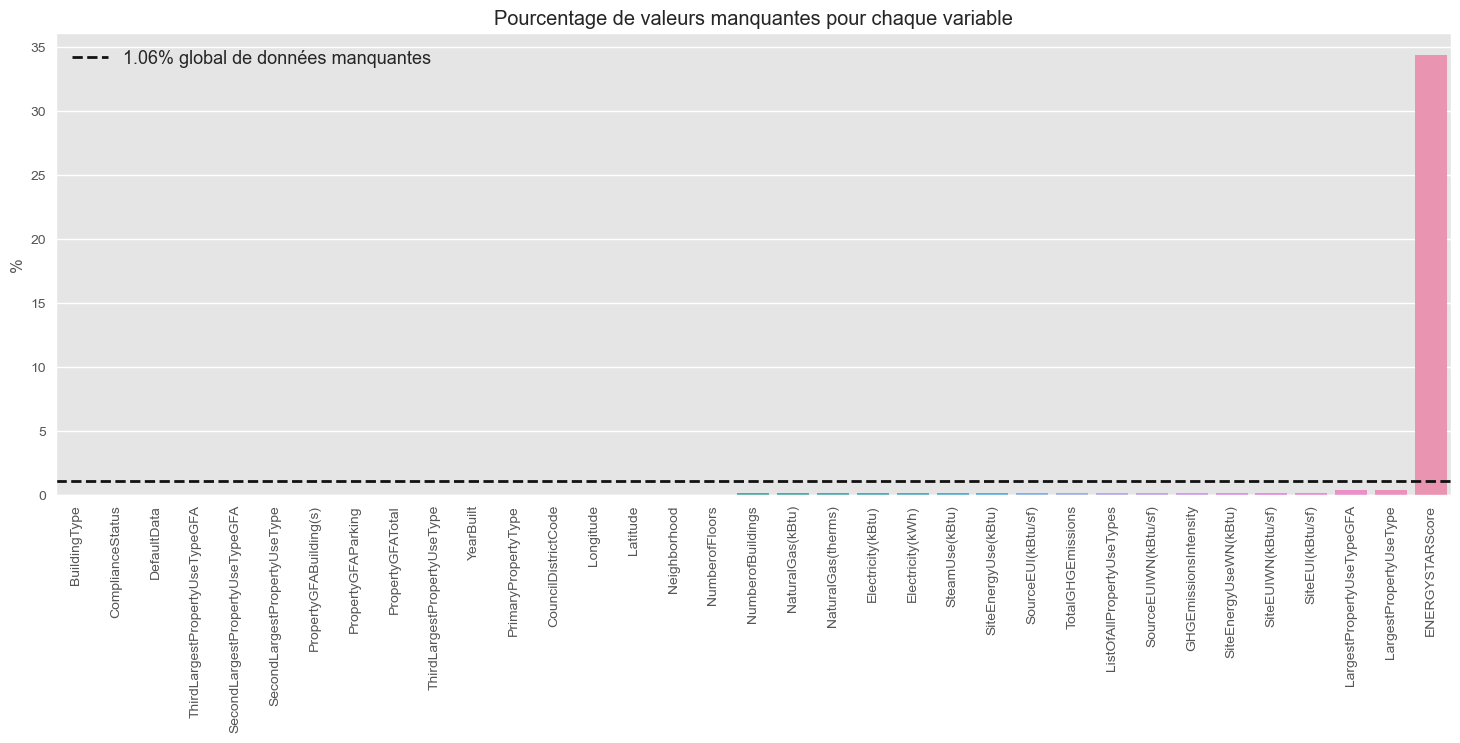

In [633]:
fig = plt.figure(figsize=(18, 6))

null_prop = fil_data.isnull().sum(axis=0).sum()/len(fil_data)/len(fil_data.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

null = fil_data.isnull().sum(axis=0).sort_values()/len(fil_data)*100
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()

<p style="font-family:times;font-size:15px"> On remarque  qu'hormis la variable EnergyStarScore, les valeurs manquantes des autres variables sont très faibles. Analysons de plus près les individus concernés. </p>


<p style="font-family:times;font-size:15px"> A présent avant de contunuer récupérons les variables numériques et catégorielles dans différentes listes en vue de les traiter différemment. Nous allons nous intéresser aux valeurs négatives des variables numériques et les transformer en NA qu'on imputera après par la médiane.</p>

In [634]:
num_columns = list(fil_data.select_dtypes(include=['float64', 'int64']).columns) # Variables numériques
obj_columns = list(fil_data.select_dtypes(include=['object', 'bool']).columns) # Variables catégorielles
obj_columns,num_columns

(['BuildingType',
  'PrimaryPropertyType',
  'Neighborhood',
  'ListOfAllPropertyUseTypes',
  'LargestPropertyUseType',
  'SecondLargestPropertyUseType',
  'ThirdLargestPropertyUseType',
  'DefaultData',
  'ComplianceStatus'],
 ['CouncilDistrictCode',
  'Latitude',
  'Longitude',
  'YearBuilt',
  'NumberofBuildings',
  'NumberofFloors',
  'PropertyGFATotal',
  'PropertyGFAParking',
  'PropertyGFABuilding(s)',
  'LargestPropertyUseTypeGFA',
  'SecondLargestPropertyUseTypeGFA',
  'ThirdLargestPropertyUseTypeGFA',
  'ENERGYSTARScore',
  'SiteEUI(kBtu/sf)',
  'SiteEUIWN(kBtu/sf)',
  'SourceEUI(kBtu/sf)',
  'SourceEUIWN(kBtu/sf)',
  'SiteEnergyUse(kBtu)',
  'SiteEnergyUseWN(kBtu)',
  'SteamUse(kBtu)',
  'Electricity(kWh)',
  'Electricity(kBtu)',
  'NaturalGas(therms)',
  'NaturalGas(kBtu)',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'])

<p style="font-family:times;font-size:15px">La variable <b>CouncilDistrictCode</b> est normalement catégorielle nous allons la convertir et refaire le travail.</p>

In [635]:
fil_data["CouncilDistrictCode"] = fil_data["CouncilDistrictCode"].apply(str)
num_columns = list(fil_data.select_dtypes(include=['float64', 'int64']).columns)
obj_columns = list(fil_data.select_dtypes(include=['object', 'bool']).columns)
obj_columns,num_columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_21076\3177478698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data["CouncilDistrictCode"] = fil_data["CouncilDistrictCode"].apply(str)


(['BuildingType',
  'PrimaryPropertyType',
  'CouncilDistrictCode',
  'Neighborhood',
  'ListOfAllPropertyUseTypes',
  'LargestPropertyUseType',
  'SecondLargestPropertyUseType',
  'ThirdLargestPropertyUseType',
  'DefaultData',
  'ComplianceStatus'],
 ['Latitude',
  'Longitude',
  'YearBuilt',
  'NumberofBuildings',
  'NumberofFloors',
  'PropertyGFATotal',
  'PropertyGFAParking',
  'PropertyGFABuilding(s)',
  'LargestPropertyUseTypeGFA',
  'SecondLargestPropertyUseTypeGFA',
  'ThirdLargestPropertyUseTypeGFA',
  'ENERGYSTARScore',
  'SiteEUI(kBtu/sf)',
  'SiteEUIWN(kBtu/sf)',
  'SourceEUI(kBtu/sf)',
  'SourceEUIWN(kBtu/sf)',
  'SiteEnergyUse(kBtu)',
  'SiteEnergyUseWN(kBtu)',
  'SteamUse(kBtu)',
  'Electricity(kWh)',
  'Electricity(kBtu)',
  'NaturalGas(therms)',
  'NaturalGas(kBtu)',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'])

In [636]:
# DataFrame renseignant sur le nombre de valeurs manquantes et de valeurs négatives par variable
data_dict = {'Variable': [], 'Missing Values': [], 'Negative Values': []}
for label in num_columns:
    missing_values = fil_data[label].isna().sum()
    negative_values = sum(fil_data[label] < 0.0)
    data_dict['Variable'].append(label)
    data_dict['Missing Values'].append(missing_values)
    data_dict['Negative Values'].append(negative_values)
result_df = pd.DataFrame(data_dict)
print(result_df)

                           Variable  Missing Values  Negative Values
0                          Latitude               0                0
1                         Longitude               0             1668
2                         YearBuilt               0                0
3                 NumberofBuildings               2                0
4                    NumberofFloors               0                0
5                  PropertyGFATotal               0                0
6                PropertyGFAParking               0                0
7            PropertyGFABuilding(s)               0                0
8         LargestPropertyUseTypeGFA               6                0
9   SecondLargestPropertyUseTypeGFA               0                0
10   ThirdLargestPropertyUseTypeGFA               0                0
11                  ENERGYSTARScore             574                0
12                 SiteEUI(kBtu/sf)               3                0
13               SiteEUIWN(kBtu/sf

In [637]:
(fil_data['GHGEmissionsIntensity'] == 1000*fil_data['TotalGHGEmissions']/fil_data['PropertyGFATotal']).all()

False

In [638]:
neg_cols = [col for col in num_columns if col != 'Longitude' and (fil_data[col] < 0).any()]
medians = fil_data[neg_cols].median()
for col in neg_cols:
    mask = (fil_data[col] < 0)
    fil_data.loc[mask, col] = medians[col]

In [639]:
data_dict = {'Variable': [], 'Missing Values': [], 'Negative Values': []}
for label in neg_cols:
    missing_values = fil_data[label].isna().sum()
    negative_values = sum(fil_data[label] < 0.0)
    data_dict['Variable'].append(label)
    data_dict['Missing Values'].append(missing_values)
    data_dict['Negative Values'].append(negative_values)
result_df = pd.DataFrame(data_dict)
print(result_df)

                Variable  Missing Values  Negative Values
0   SourceEUIWN(kBtu/sf)               2                0
1       Electricity(kWh)               2                0
2      Electricity(kBtu)               2                0
3      TotalGHGEmissions               2                0
4  GHGEmissionsIntensity               2                0


<p style="font-family:times;font-size:15px"> Tout est parfait. Concentrons nous maintenant sur les valeurs manquantes des colonnes autre que celle négative. Même là on imputera par la médiane sauf la colonne <b>ENERGYSTARScore</b> dont le traitement sera discuté dans la suite.  </p>

In [640]:
numeric_cols_2 = [col for col in num_columns if col != 'ENERGYSTARScore']
for col in numeric_cols_2:
    median_value = fil_data[col].median()
    fil_data[col].fillna(median_value, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21076\1201430114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data[col].fillna(median_value, inplace=True)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


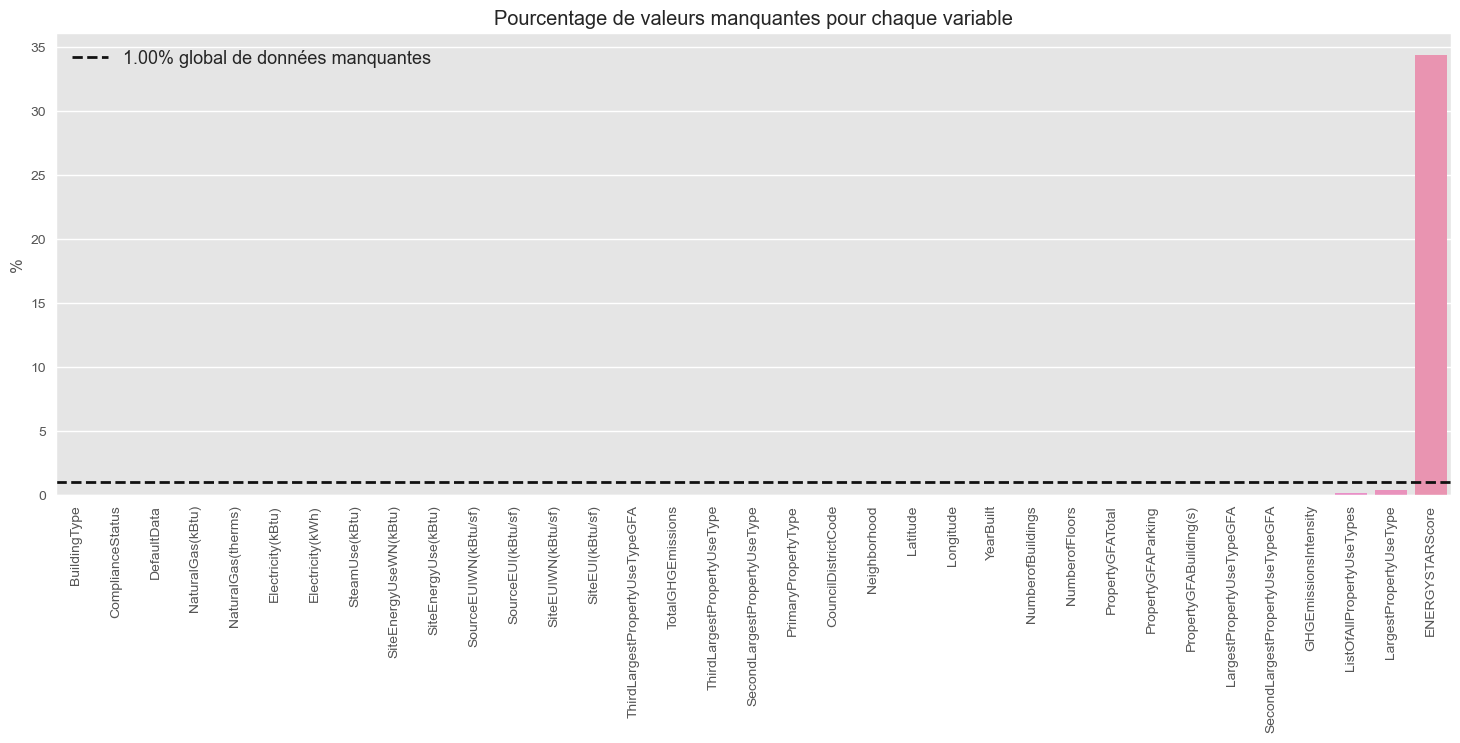

In [641]:
fig = plt.figure(figsize=(18, 6))

null_prop = fil_data.isnull().sum(axis=0).sum()/len(fil_data)/len(fil_data.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

null = fil_data.isnull().sum(axis=0).sort_values()/len(fil_data)*100
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px"> Vu le taux de valeurs manquantes actuelles, nous n'allons que supprimer celles de la colonne <b>LargestPropertyUseType</b>. </p>


In [642]:
fil_data= fil_data.dropna(subset=[col for col in fil_data.columns if col != 'ENERGYSTARScore'], how='any')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


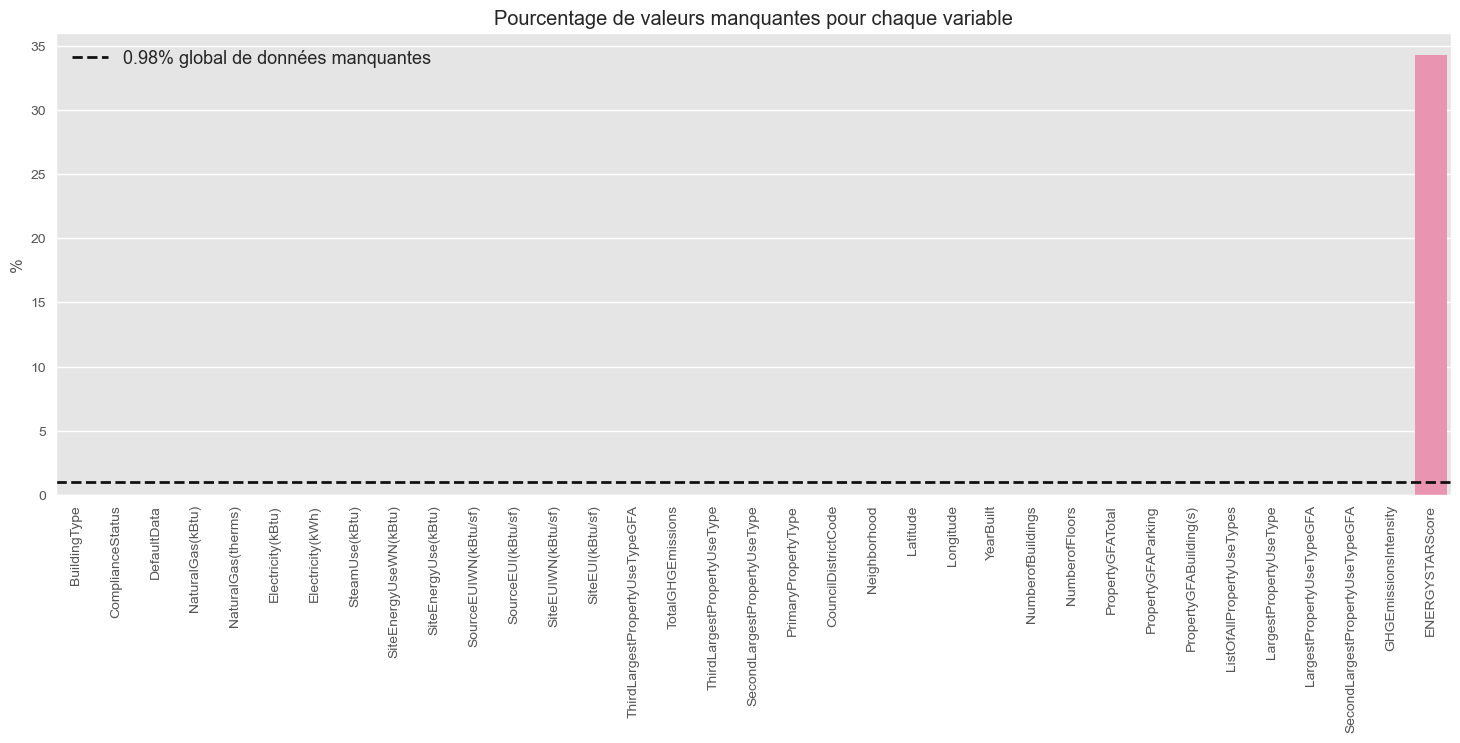

In [643]:
fig = plt.figure(figsize=(18, 6))

null_prop = fil_data.isnull().sum(axis=0).sum()/len(fil_data)/len(fil_data.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

null = fil_data.isnull().sum(axis=0).sort_values()/len(fil_data)*100
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px"> Il ne reste donc que la variable <b>ENERGYSTARScore</b>. Faisons un focus sur cette variable</p>

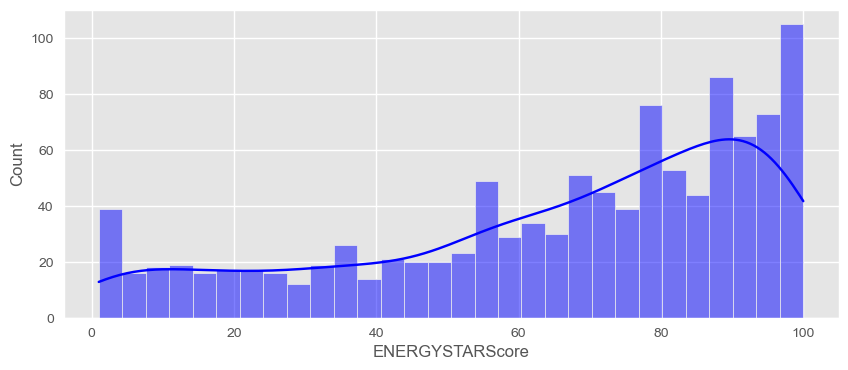

In [644]:
plt.figure(figsize=(10, 4))
sns.histplot(data=fil_data, x='ENERGYSTARScore', kde=True, color='blue', bins=30)
plt.show()

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">4. Traitement des valeurs aberrantes</h4>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

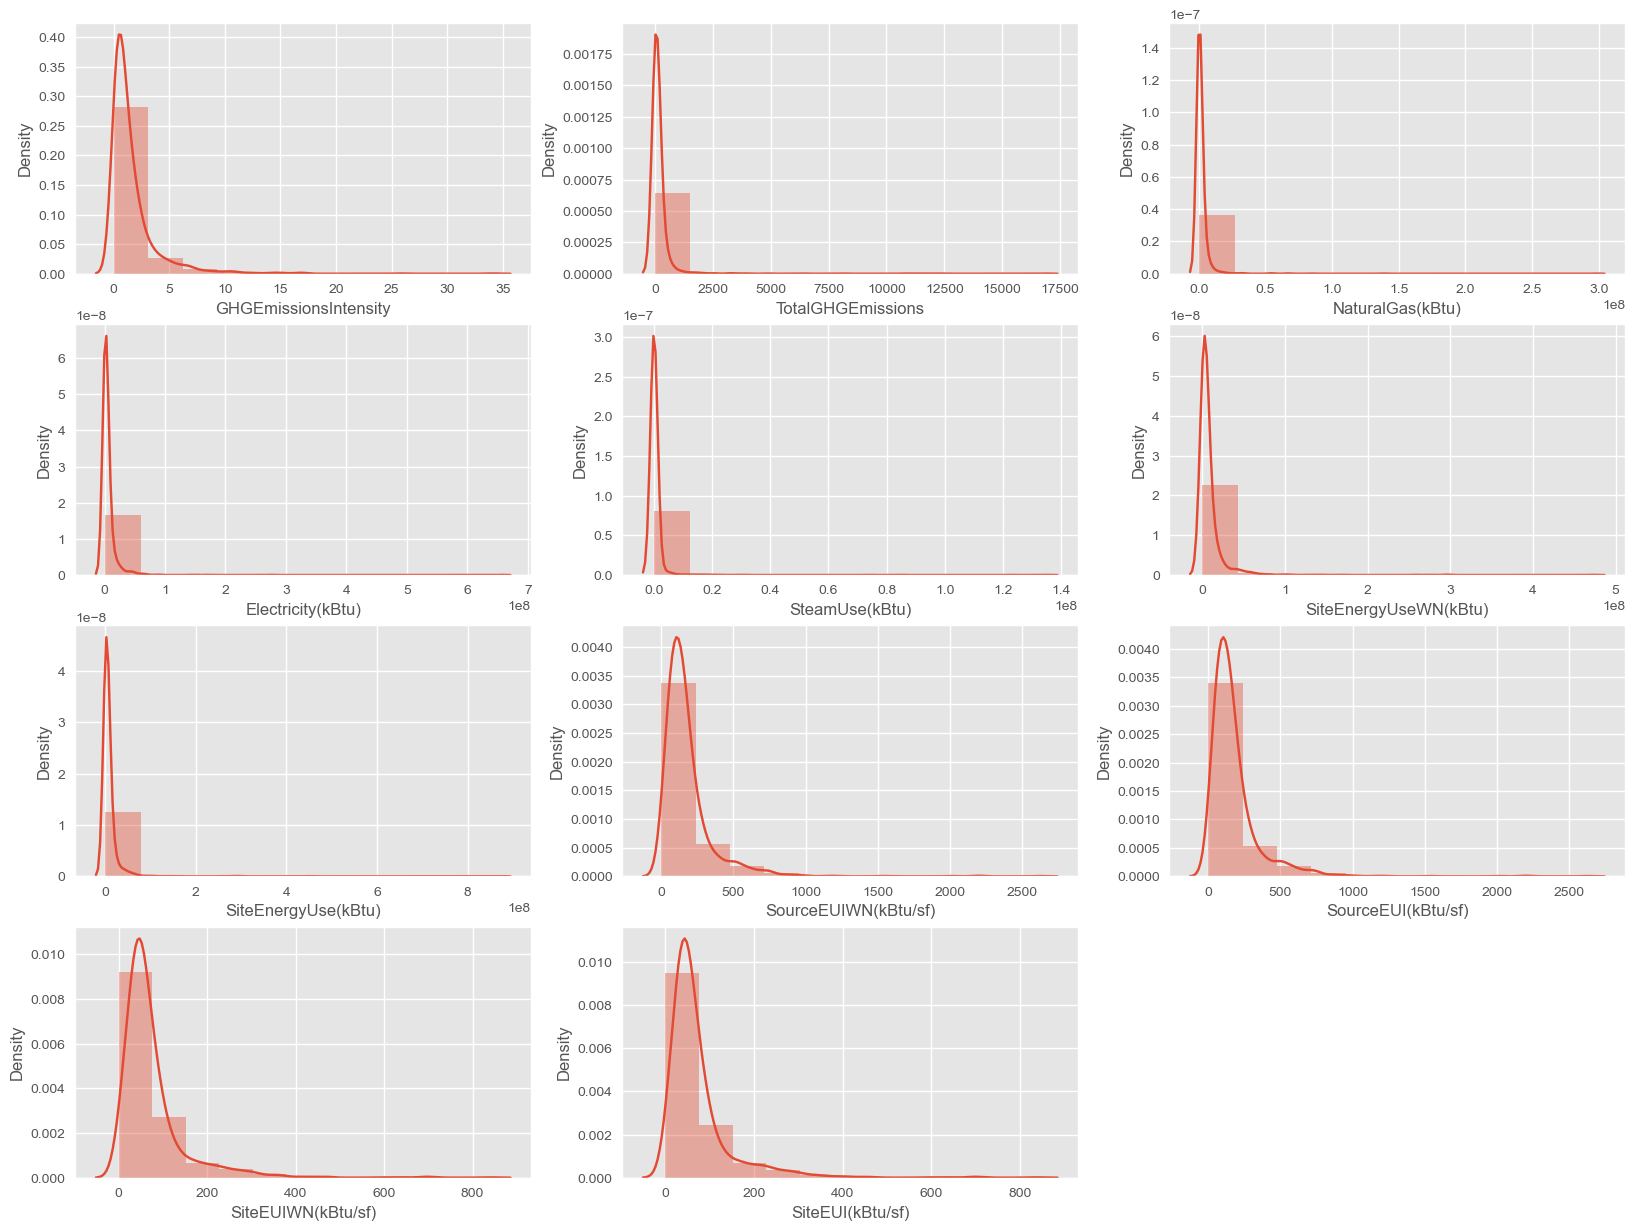

In [645]:
# Création d'un objet contenant toutes les variables liées à l'énergie
energy = ['GHGEmissionsIntensity','TotalGHGEmissions','NaturalGas(kBtu)','Electricity(kBtu)','SteamUse(kBtu)','SiteEnergyUseWN(kBtu)','SiteEnergyUse(kBtu)','SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)',
          'SiteEUIWN(kBtu/sf)','SiteEUI(kBtu/sf)']
plt.style.use('ggplot')
fig = plt.figure(1, figsize=(20, 15))
for i, label in enumerate(energy) :
    plt.subplot(4, 3, i + 1)
    sns.distplot(fil_data[label], bins=int(1 + np.log2(len(fil_data))))
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px"> On remarque que les graphiques ne sont pas assez concis. On passera alors à une transformation au log. Mais nous remarquons néanmoins une présence de valeurs aberrantes.</p>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

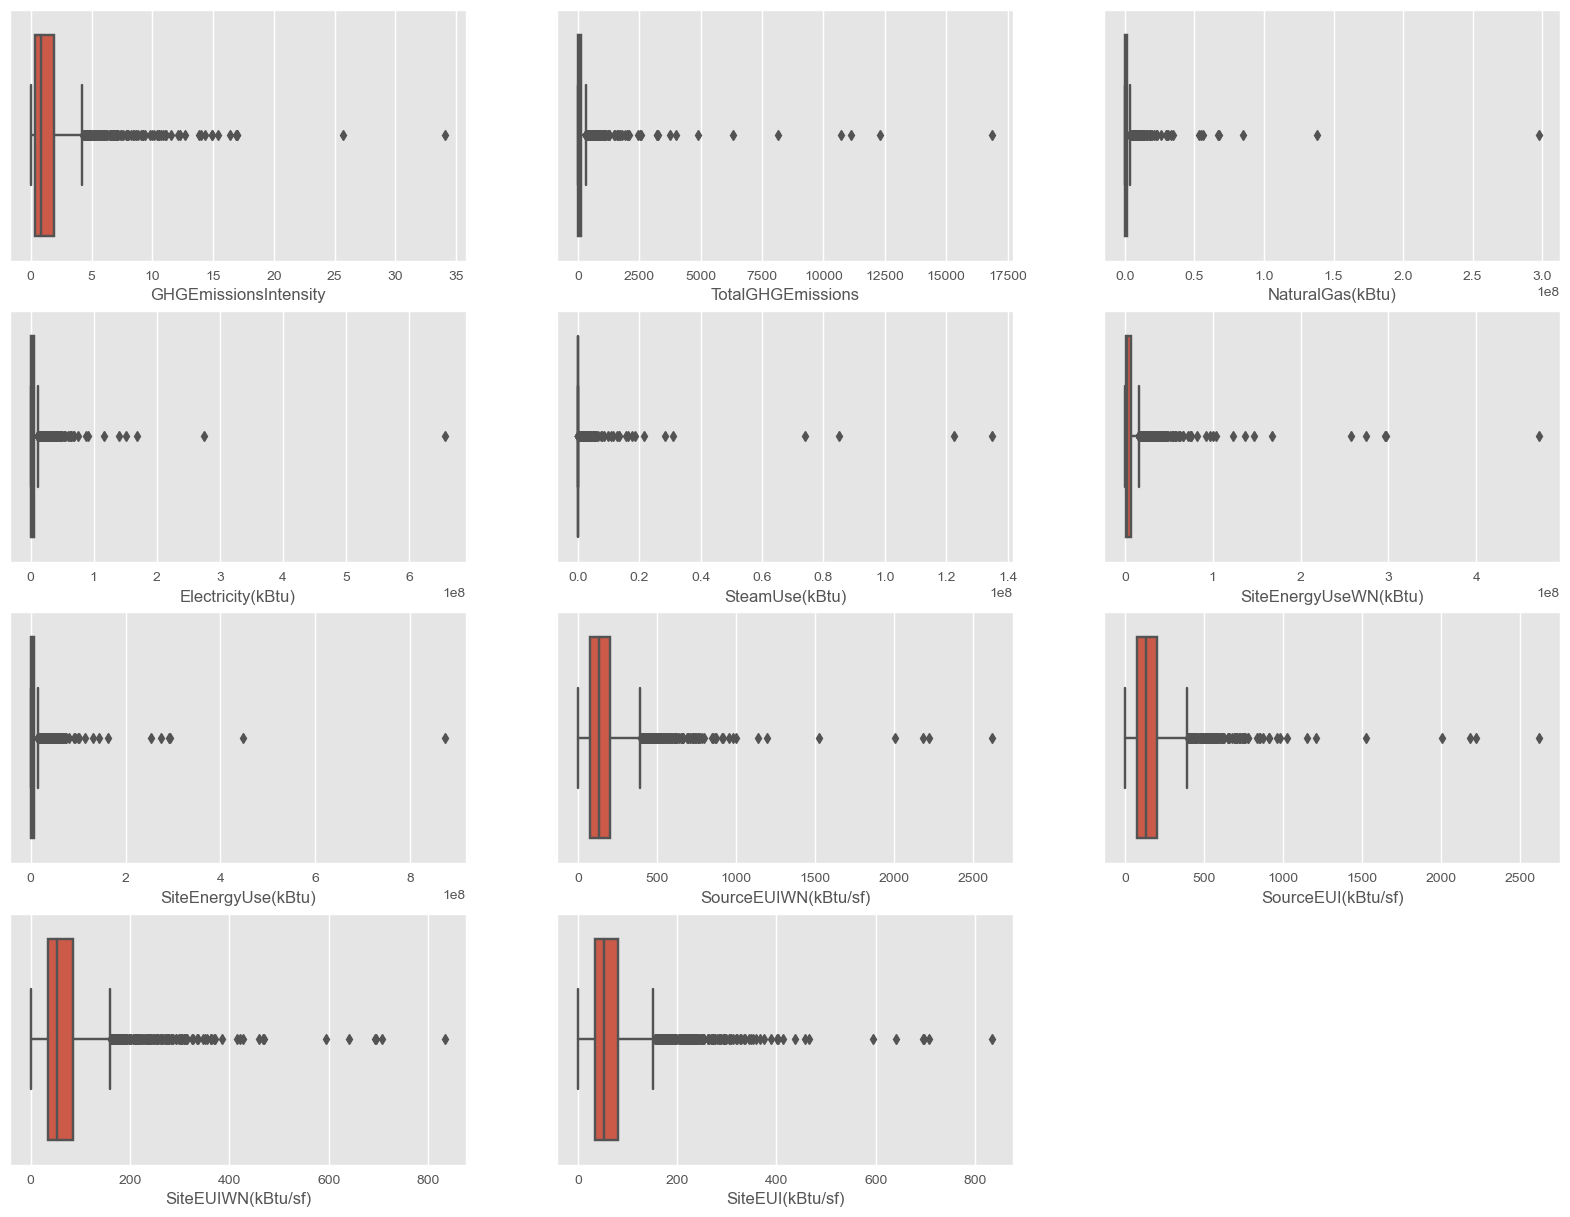

In [646]:
#Boites à moustaches

fig = plt.figure(1, figsize=(20, 15))
for i,label in enumerate(energy) :
    plt.subplot(4, 3, i + 1)
    sns.boxplot(fil_data[label], orient="v")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

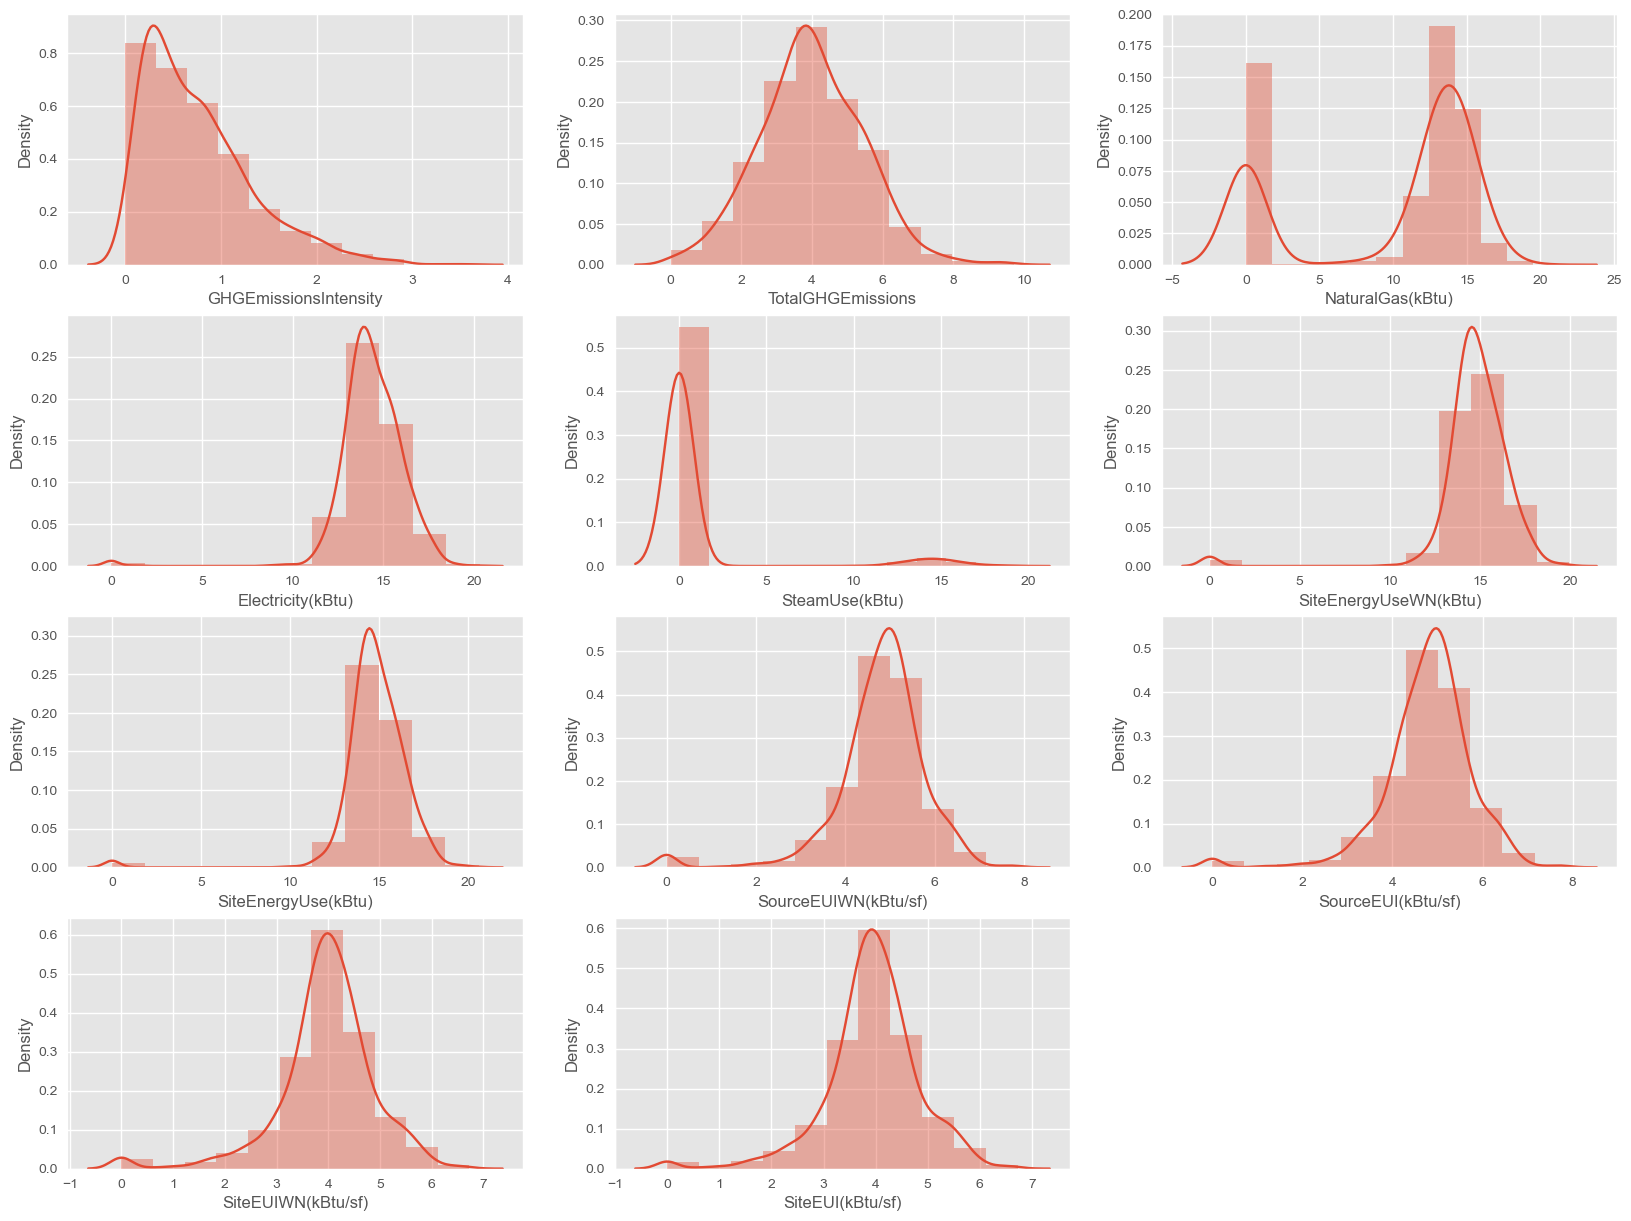

In [647]:
# Transformation au log

plt.style.use('ggplot')
fig = plt.figure(1, figsize=(20, 15))
for i, label in enumerate(energy) :
    plt.subplot(4, 3, i + 1)
    sns.distplot(fil_data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(fil_data))))
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

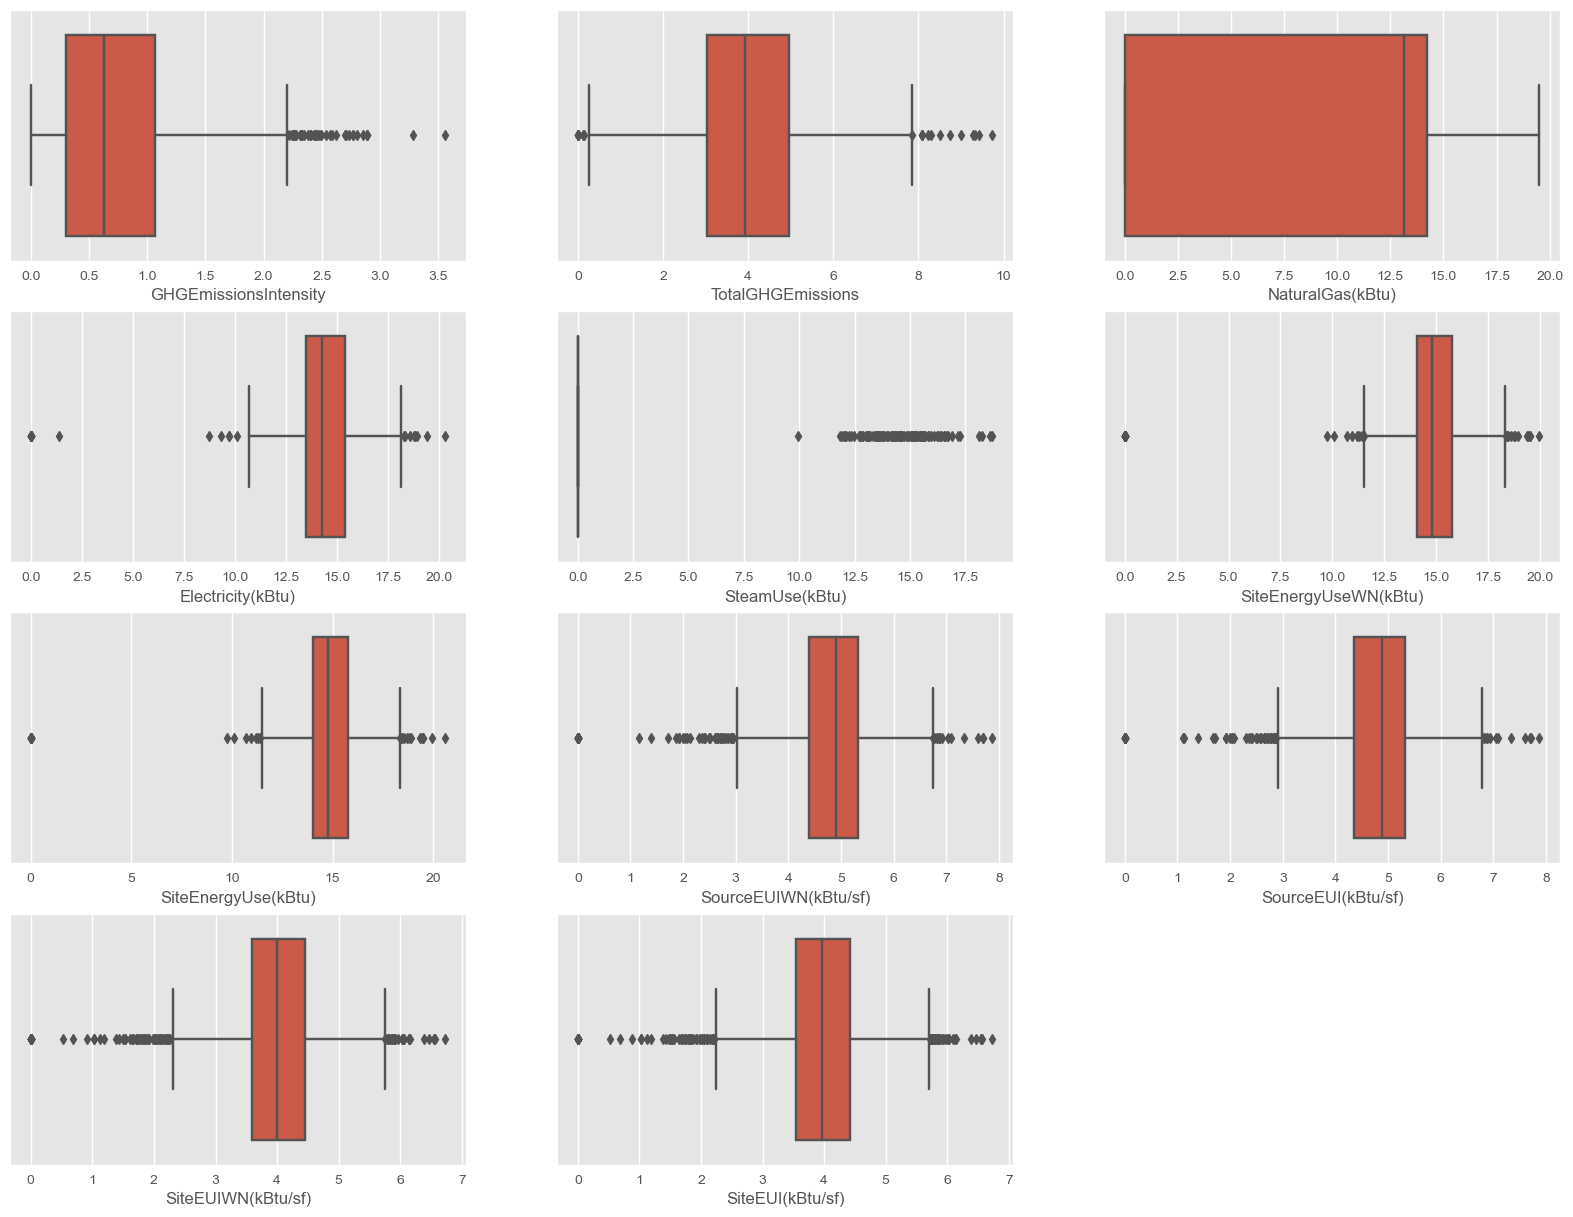

In [648]:
fig = plt.figure(1, figsize=(20, 15))
for i,label in enumerate(energy) :
    plt.subplot(4, 3, i + 1)
    sns.boxplot(fil_data[label].apply(lambda x : np.log(1 + x)), orient="v")
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px"> Nous allons dans notre cadre traiter les valeurs aberrantes en utilisant la méthode de Coulomb et McKay. Ce choix est motivé par le fait que nos valeurs sont de grands ordres et donc les autres méthodes comme celle de l'intervalle interquartile peuvent ne pas donner le résultats escompté si on les applique sur des données brutes. L'avantage de la méthode Coulomb et Mckay est qu'elle utilise les logartihmes.</p>

<p style="text-align:justify;font-family:times;font-size:15px"> Selon cette méthode, une valeur \( X_j \) est dite aberrante si
\[
\ln(X_j) > \text{moy}(\ln(X)) + 3 \times \sigma(\ln(X))
\]</p>



In [649]:
fil_data_2 = fil_data

In [650]:
for label in energy :
    std_label = fil_data_2[label].apply(lambda x : np.log(1 + x)).std()
    mean_label = fil_data_2[label].apply(lambda x : np.log(1 + x)).mean()
    fil_data_2 = fil_data_2[(fil_data[label].apply(lambda x : np.log(1 + x))< mean_label + 3*std_label)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_21076\3112893322.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fil_data_2 = fil_data_2[(fil_data[label].apply(lambda x : np.log(1 + x))< mean_label + 3*std_label)]


In [651]:
len(fil_data_2)- len(fil_data)

-135

<p style="text-align:justify;font-family:times;font-size:15px"> La méthode de Coulomb et McKay a donc éliminé <b>135</b> observations.</p>

<p style="text-align:justify;font-family:times;font-size:15px"> Revisualisons la distribution de nos variables.</p>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

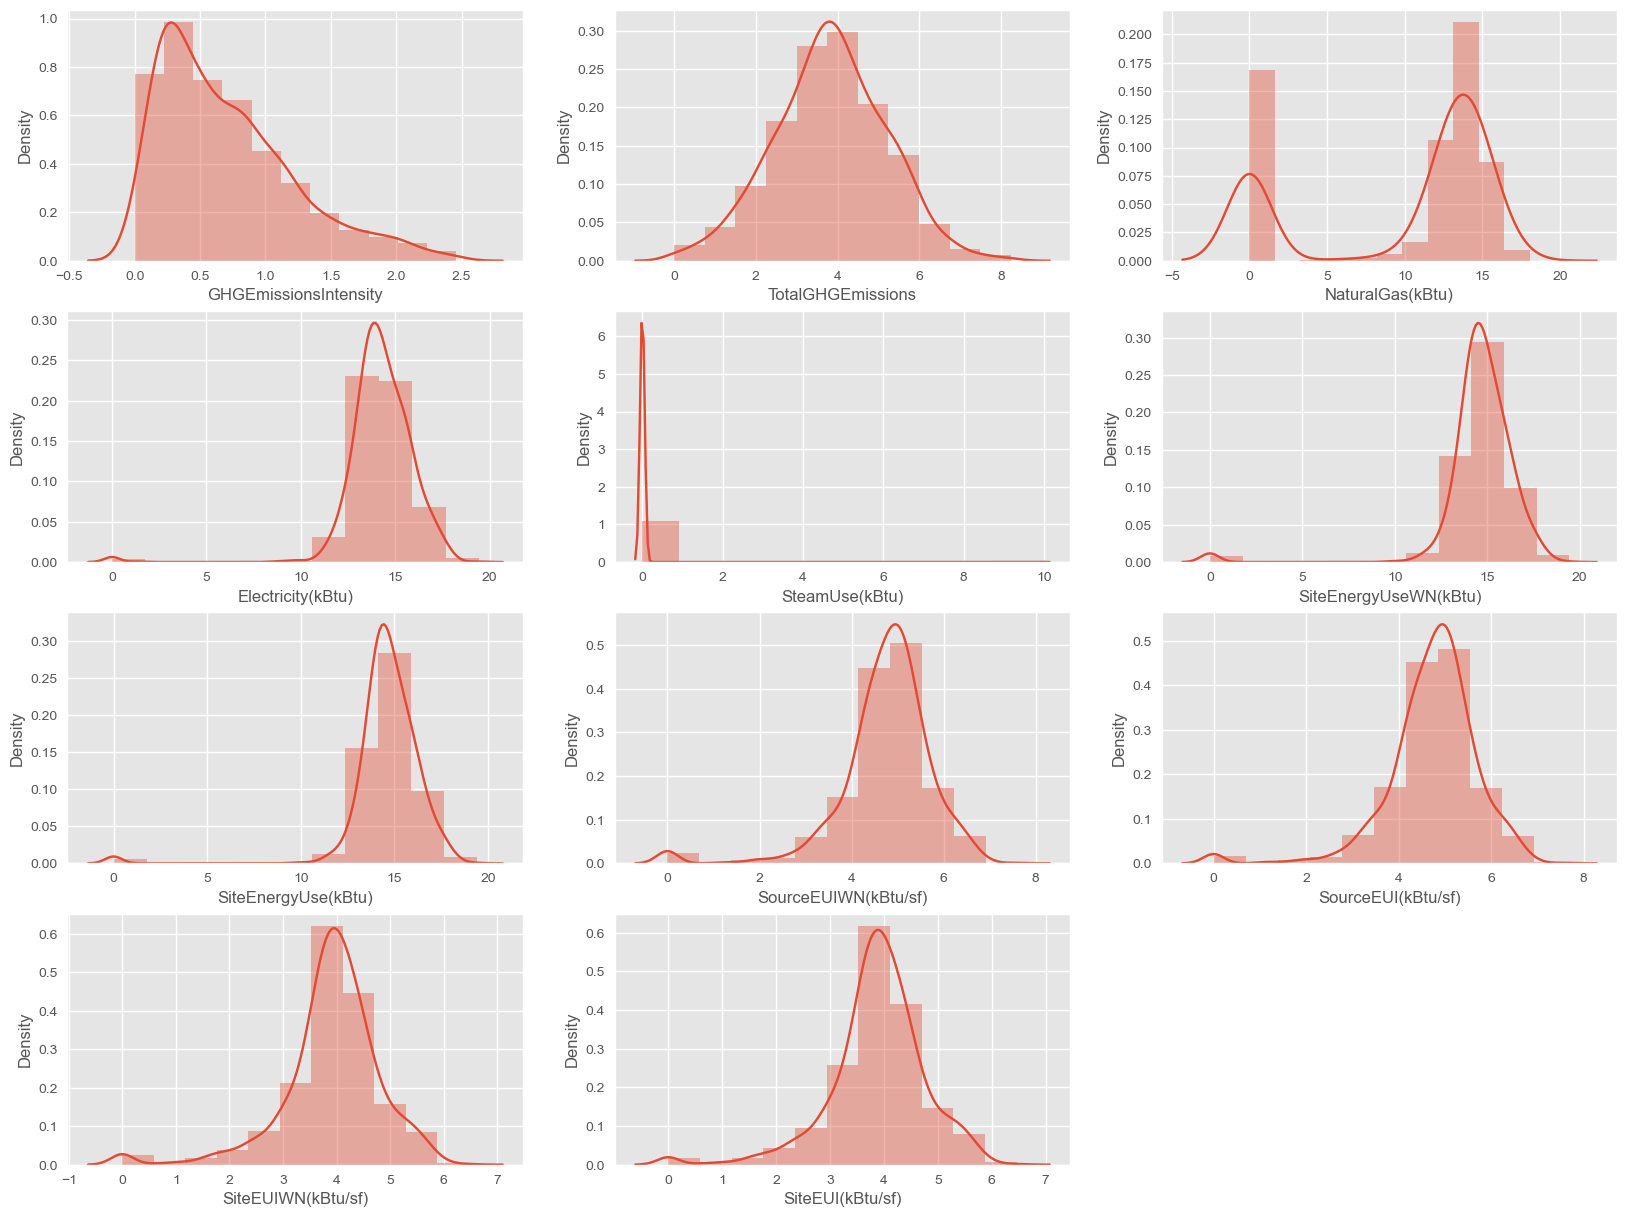

In [652]:
plt.style.use('ggplot')
fig = plt.figure(1, figsize=(20, 15))
for i, label in enumerate(energy) :
    plt.subplot(4, 3, i + 1)
    sns.distplot(fil_data_2[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(fil_data_2))))
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

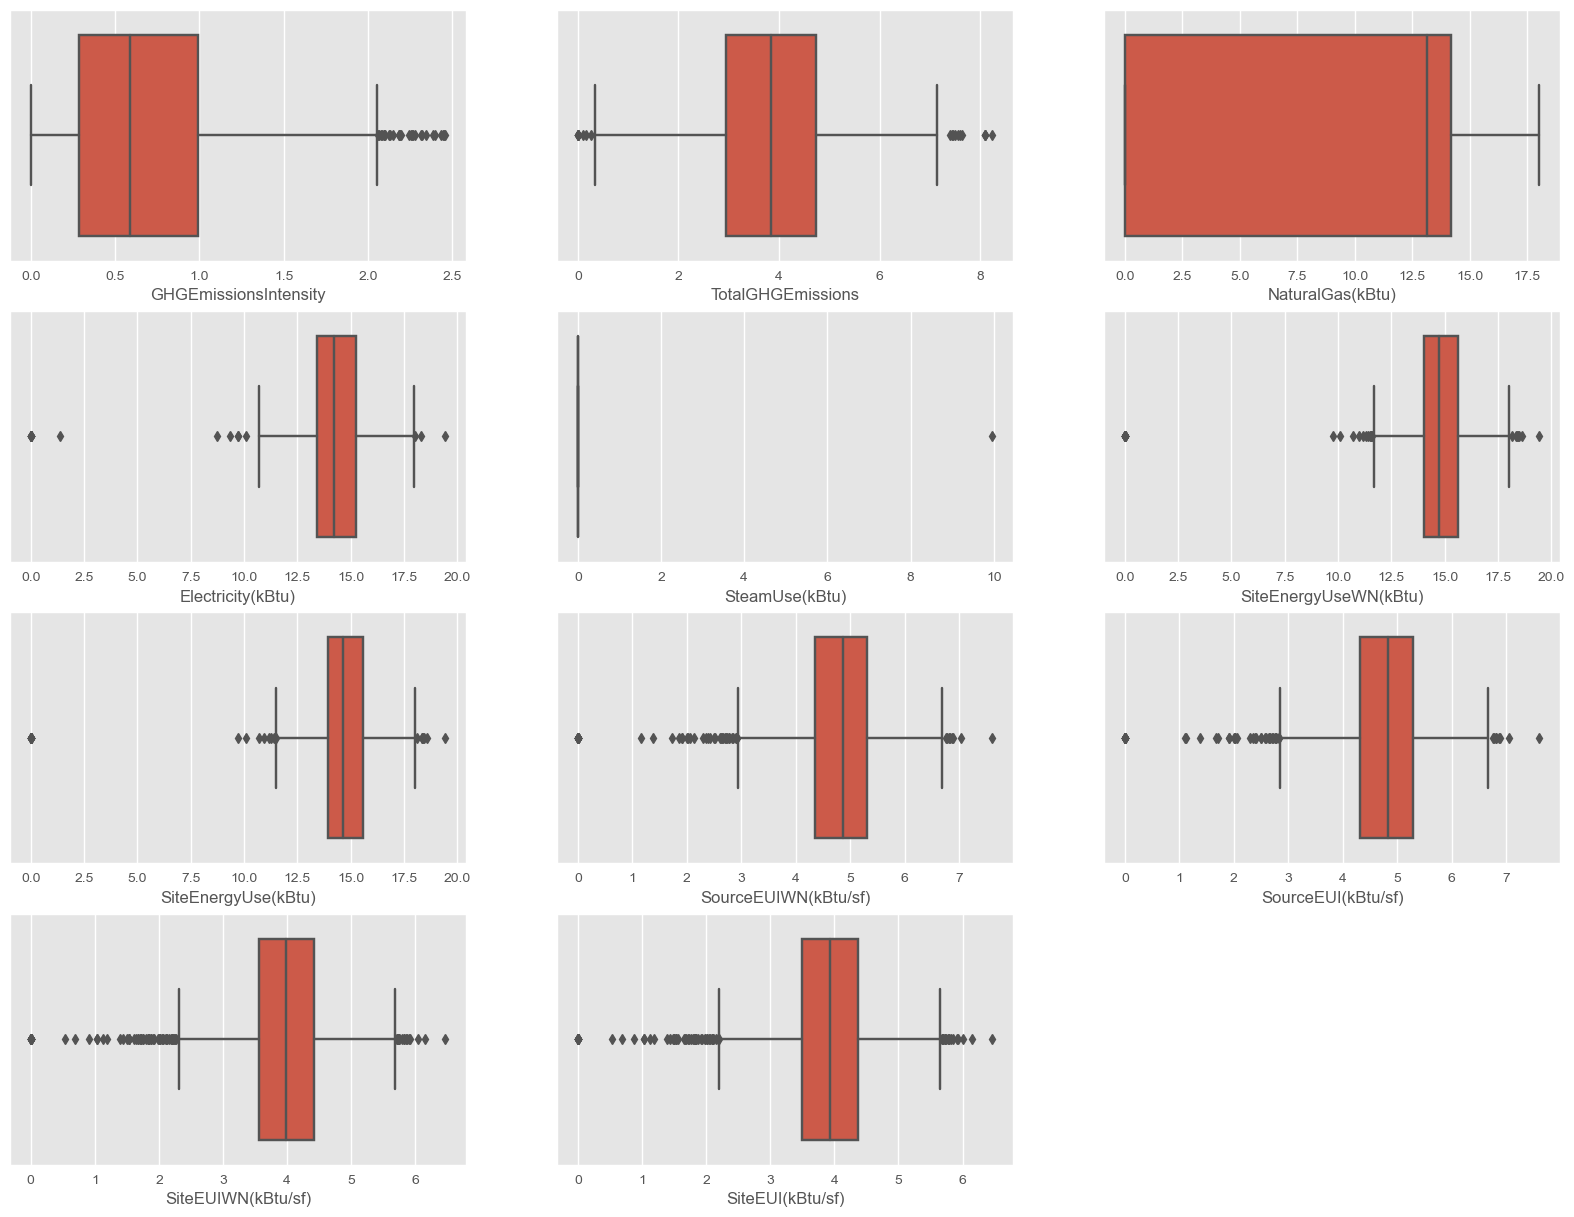

In [653]:
fig = plt.figure(1, figsize=(20, 15))
for i,label in enumerate(energy) :
    plt.subplot(4, 3, i + 1)
    sns.boxplot(fil_data_2[label].apply(lambda x : np.log(1 + x)), orient="v")
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px"> <b>Il est normal que le boxplot nous montre toujours des outliers car il est basé sur la méthode de l'intervalle interquartile alors que notre méthode de détection de valeurs aberrantes est celle de Coulomb et McKay </b>.</p>

<p style="text-align:justify;font-family:times;font-size:15px"> A présent essayons de gérer les variables catégorielles</p>

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">5. Analyse des variables catégorielles</h4>

<p style="text-align:justify;font-family:times;font-size:15px"> Il est important de se rappeler les variables catégorielles de notre base de données. </p>

In [654]:
obj_columns

['BuildingType',
 'PrimaryPropertyType',
 'CouncilDistrictCode',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'DefaultData',
 'ComplianceStatus']

<p style="text-align:justify;font-family:times;font-size:15px"> Sortons le nombre de modalités par variables catégorlelles. </p>

In [655]:
fil_data_2[obj_columns].apply(lambda col: col.nunique())

BuildingType                      5
PrimaryPropertyType              22
CouncilDistrictCode               7
Neighborhood                     19
ListOfAllPropertyUseTypes       337
LargestPropertyUseType           56
SecondLargestPropertyUseType     45
ThirdLargestPropertyUseType      39
DefaultData                       2
ComplianceStatus                  4
dtype: int64

In [656]:
# Transformons les modalités des variables catégorielles en majuscule pour éviter un double compte
for cat in fil_data_2[obj_columns]:
    fil_data_2[cat] = fil_data_2[cat].apply(lambda x: str(x).upper())
fil_data_2[obj_columns]

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,DefaultData,ComplianceStatus
1,NONRESIDENTIAL,HOTEL,7,DOWNTOWN,"HOTEL, PARKING, RESTAURANT",HOTEL,PARKING,RESTAURANT,FALSE,COMPLIANT
4,NONRESIDENTIAL,HOTEL,7,DOWNTOWN,"HOTEL, PARKING, SWIMMING POOL",HOTEL,PARKING,SWIMMING POOL,FALSE,COMPLIANT
5,NONRESIDENTIAL COS,OTHER,7,DOWNTOWN,POLICE STATION,POLICE STATION,NOT CONCERNED,NOT CONCERNED,FALSE,COMPLIANT
6,NONRESIDENTIAL,HOTEL,7,DOWNTOWN,HOTEL,HOTEL,NOT CONCERNED,NOT CONCERNED,FALSE,COMPLIANT
8,NONRESIDENTIAL,HOTEL,7,DOWNTOWN,HOTEL,HOTEL,NOT CONCERNED,NOT CONCERNED,FALSE,COMPLIANT
...,...,...,...,...,...,...,...,...,...,...
3370,NONRESIDENTIAL COS,OTHER,1,DELRIDGE NEIGHBORHOODS,OTHER - RECREATION,OTHER - RECREATION,NOT CONCERNED,NOT CONCERNED,FALSE,COMPLIANT
3371,NONRESIDENTIAL COS,OFFICE,2,GREATER DUWAMISH,OFFICE,OFFICE,NOT CONCERNED,NOT CONCERNED,TRUE,ERROR - CORRECT DEFAULT DATA
3372,NONRESIDENTIAL COS,OTHER,2,DOWNTOWN,OTHER - RECREATION,OTHER - RECREATION,NOT CONCERNED,NOT CONCERNED,FALSE,COMPLIANT
3374,NONRESIDENTIAL COS,MIXED USE PROPERTY,1,GREATER DUWAMISH,"FITNESS CENTER/HEALTH CLUB/GYM, FOOD SERVICE, ...",OTHER - RECREATION,FITNESS CENTER/HEALTH CLUB/GYM,PRE-SCHOOL/DAYCARE,FALSE,COMPLIANT


In [657]:
# Redeterminons le nombre de modalités par variables
fil_data_2[obj_columns].apply(lambda col: col.nunique())

BuildingType                      5
PrimaryPropertyType              22
CouncilDistrictCode               7
Neighborhood                     14
ListOfAllPropertyUseTypes       337
LargestPropertyUseType           56
SecondLargestPropertyUseType     45
ThirdLargestPropertyUseType      39
DefaultData                       2
ComplianceStatus                  4
dtype: int64

<p style="text-align:justify;font-family:times;font-size:15px"> On remarque que le nombre de modalités de la variable Neighborhood a diminué. Faisons un focus sur ses modalités pour voir si elles ne nécessitent pas un recodage.</p>

In [658]:
fil_data_2['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

<p style="text-align:justify;font-family:times;font-size:15px"> On peut remarquer que DELRIDGE NEIGHBORHOODS et DELRIDGE correspondent à la même modalité. Dans la suite, on remplace tous les DELRIDGE NEIGHBORHOODS par DELRIDGE </p>

In [659]:
fil_data_2['Neighborhood'] = fil_data_2['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
fil_data_2['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

In [660]:
fil_data_2['PrimaryPropertyType'].unique()

array(['HOTEL', 'OTHER', 'K-12 SCHOOL', 'UNIVERSITY',
       'SMALL- AND MID-SIZED OFFICE', 'SELF-STORAGE FACILITY',
       'WAREHOUSE', 'LARGE OFFICE', 'SENIOR CARE COMMUNITY',
       'MEDICAL OFFICE', 'RETAIL STORE', 'HOSPITAL', 'RESIDENCE HALL',
       'DISTRIBUTION CENTER', 'MIXED USE PROPERTY', 'WORSHIP FACILITY',
       'SUPERMARKET / GROCERY STORE', 'LABORATORY',
       'REFRIGERATED WAREHOUSE', 'LOW-RISE MULTIFAMILY', 'RESTAURANT',
       'OFFICE'], dtype=object)

In [661]:
fil_data_2['LargestPropertyUseType'].unique()

array(['HOTEL', 'POLICE STATION', 'COURTHOUSE', 'OTHER', 'K-12 SCHOOL',
       'COLLEGE/UNIVERSITY', 'AUTOMOBILE DEALERSHIP', 'OFFICE',
       'SELF-STORAGE FACILITY', 'NON-REFRIGERATED WAREHOUSE',
       'OTHER - MALL', 'SENIOR CARE COMMUNITY', 'MEDICAL OFFICE',
       'RETAIL STORE', 'HOSPITAL (GENERAL MEDICAL & SURGICAL)', 'MUSEUM',
       'REPAIR SERVICES (VEHICLE, SHOE, LOCKSMITH, ETC)',
       'OTHER - LODGING/RESIDENTIAL', 'RESIDENCE HALL/DORMITORY',
       'OTHER/SPECIALTY HOSPITAL', 'FINANCIAL OFFICE',
       'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'DISTRIBUTION CENTER',
       'PARKING', 'MULTIFAMILY HOUSING', 'WORSHIP FACILITY', 'RESTAURANT',
       'LABORATORY', 'SUPERMARKET/GROCERY STORE', 'CONVENTION CENTER',
       'OTHER - SERVICES', 'STRIP MALL', 'WHOLESALE CLUB/SUPERCENTER',
       'REFRIGERATED WAREHOUSE', 'MANUFACTURING/INDUSTRIAL PLANT',
       'OTHER - RECREATION', 'LIFESTYLE CENTER',
       'OTHER - PUBLIC SERVICES', 'DATA CENTER', 'SOCIAL/MEETING HALL',
       

In [662]:
fil_data_2['ListOfAllPropertyUseTypes'].unique()

array(['HOTEL, PARKING, RESTAURANT', 'HOTEL, PARKING, SWIMMING POOL',
       'POLICE STATION', 'HOTEL', 'HOTEL, PARKING', 'COURTHOUSE', 'OTHER',
       'K-12 SCHOOL', 'COLLEGE/UNIVERSITY', 'AUTOMOBILE DEALERSHIP',
       'HOTEL, PARKING, RETAIL STORE, SWIMMING POOL',
       'K-12 SCHOOL, MULTIFAMILY HOUSING, OFFICE, OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY',
       'SELF-STORAGE FACILITY',
       'NON-REFRIGERATED WAREHOUSE, OFFICE, REFRIGERATED WAREHOUSE',
       'NON-REFRIGERATED WAREHOUSE, OFFICE', 'OFFICE, OTHER - EDUCATION',
       'OFFICE, SELF-STORAGE FACILITY, VOCATIONAL SCHOOL',
       'DATA CENTER, OFFICE, RETAIL STORE',
       'OTHER - MALL, PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)',
       'OFFICE, RETAIL STORE', 'HOTEL, PARKING, RESTAURANT, RETAIL STORE',
       'HOTEL, OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY, RETAIL STORE',
       'OFFICE', 'PARKING, SENIOR CARE COMMUNITY',
       'SENIOR CARE COMMUNITY', 'MEDICAL OFFICE', 'RETAIL STORE',
       'OFFICE, OTHER, PAR

<p style="font-family:times;font-size:15px"> La variable <b>ListOfAllPropertyUseTypes</b> est une variable ou chaque modalité est une liste. La garder ne serait pas pertinent, d'autant plus qu'on a l'utilisation principale du batiment. Une autre méthode pour ne pas perdre totalement cette information serait de créer une variable <b>NumberOfPropertyUseTypes</b> qui prend le nombre des différents type d'usage du batiment.</p>

In [663]:
def compter_elements_uniques(liste):
    elements = [elem.strip() for elem in liste.split(',')]
    return len(set(elements))

# Créer une nouvelle colonne contenant le nombre d'éléments uniques dans chaque liste
fil_data_2['NumberOfPropertyUseTypes'] = fil_data_2['ListOfAllPropertyUseTypes'].apply(compter_elements_uniques)

In [664]:
fil_data_2['NumberOfPropertyUseTypes'].head()

1    3
4    3
5    1
6    1
8    1
Name: NumberOfPropertyUseTypes, dtype: int64

<p style="font-family:times;font-size:15px"> Passons à quelques statistiques sur notre base de données </p>

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">6. Recodage de quelques variables qualitatives</h4>

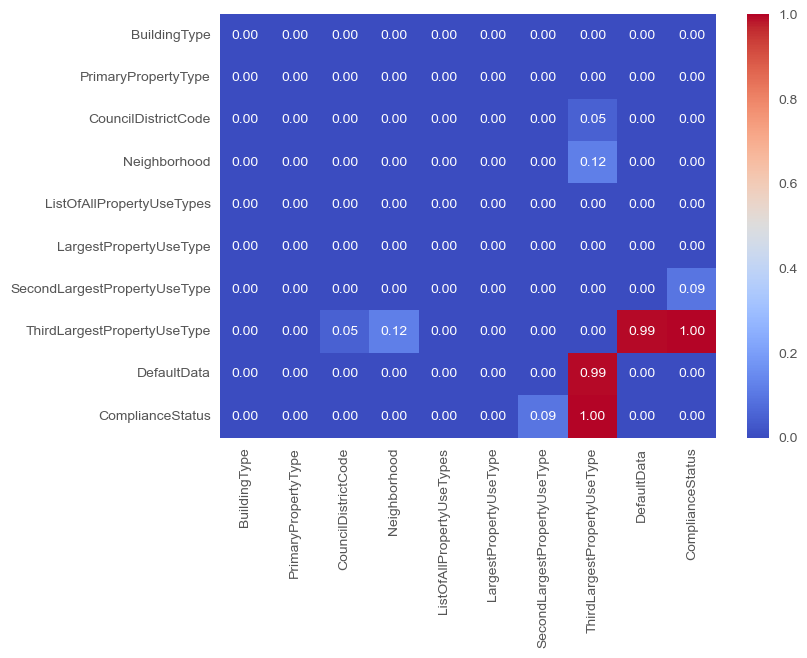

In [665]:
	#### Code simple
from scipy.stats import chi2_contingency
a = np.empty((len(fil_data_2.select_dtypes('object').columns),len(fil_data_2.select_dtypes('object').columns),))
for i in range(0,len(fil_data_2.select_dtypes('object').columns)):
    for j in range(0,len(fil_data_2.select_dtypes('object').columns)):
                tab_df = pd.crosstab(fil_data_2.select_dtypes('object').iloc[:,i], fil_data_2.select_dtypes('object').iloc[:,j])
                a[i, j] = chi2_contingency(tab_df)[1]

d = round(pd.DataFrame(a, columns=fil_data_2.select_dtypes('object').columns , index = fil_data_2.select_dtypes('object').columns), 5)
# Tracer la heatmap
sns.heatmap(d, annot=True, cmap='coolwarm', fmt=".2f")

# Afficher le graphique
plt.show()


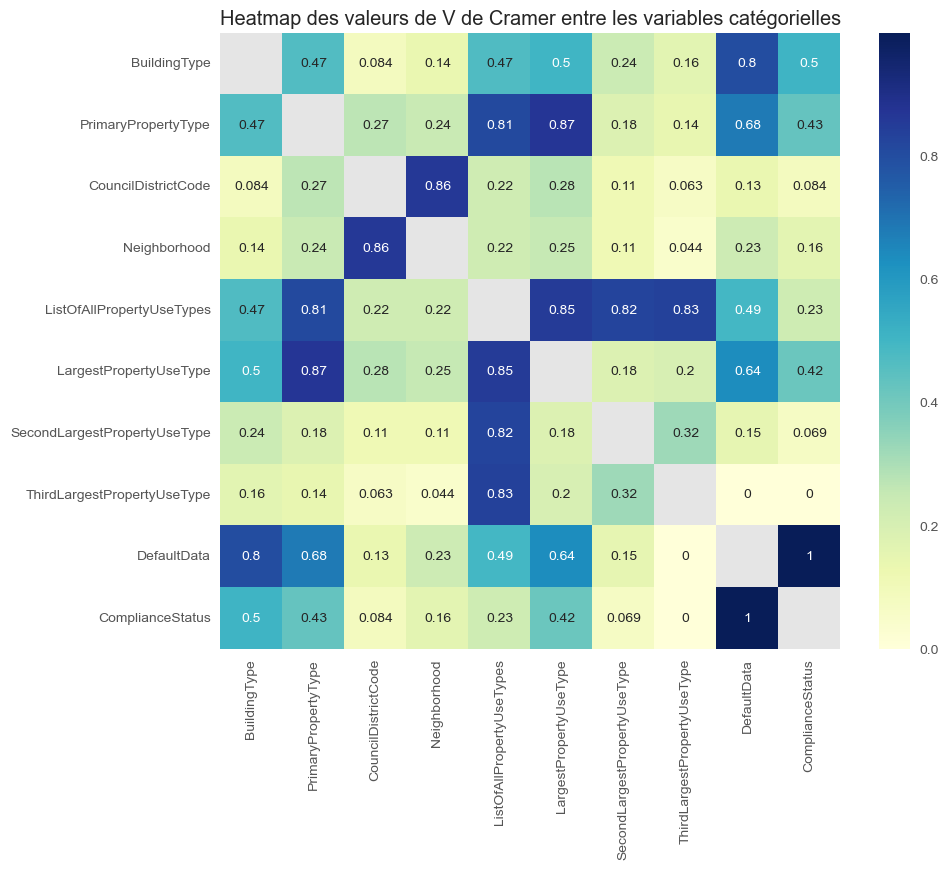

In [666]:
# Sélectionnez uniquement les colonnes catégorielles
data_cat = fil_data_2.select_dtypes(include=['object', 'category'])

# Créez une fonction pour calculer le V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)  * 2) / (n - 1)
    kcorr = k - ((k - 1) * 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Créez un DataFrame pour stocker les résultats du V de Cramer
cramers_v_results = pd.DataFrame(index=data_cat.columns, columns=data_cat.columns)

# Calculer le V de Cramer pour chaque paire de variables catégorielles
for col1 in data_cat.columns:
    for col2 in data_cat.columns:
        if col1 != col2:
            v_cramer = cramers_v(data_cat[col1], data_cat[col2])
            cramers_v_results.loc[col1, col2] = v_cramer

# Convertir les valeurs de V de Cramer en nombres flottants
cramers_v_results = cramers_v_results.astype(float)

# Créer un heatmap des valeurs de V de Cramer
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_results, annot=True, cmap="YlGnBu")
plt.title("Heatmap des valeurs de V de Cramer entre les variables catégorielles")
plt.show()

In [667]:
fil_data_2['PrimaryPropertyType'].unique()

array(['HOTEL', 'OTHER', 'K-12 SCHOOL', 'UNIVERSITY',
       'SMALL- AND MID-SIZED OFFICE', 'SELF-STORAGE FACILITY',
       'WAREHOUSE', 'LARGE OFFICE', 'SENIOR CARE COMMUNITY',
       'MEDICAL OFFICE', 'RETAIL STORE', 'HOSPITAL', 'RESIDENCE HALL',
       'DISTRIBUTION CENTER', 'MIXED USE PROPERTY', 'WORSHIP FACILITY',
       'SUPERMARKET / GROCERY STORE', 'LABORATORY',
       'REFRIGERATED WAREHOUSE', 'LOW-RISE MULTIFAMILY', 'RESTAURANT',
       'OFFICE'], dtype=object)

In [668]:
fil_data_2.loc[fil_data_2['PrimaryPropertyType'] == 'LOW-RISE MULTIFAMILY', 'ListOfAllPropertyUseTypes']

644                                   MULTIFAMILY HOUSING
1300    BAR/NIGHTCLUB, FOOD SALES, MULTIFAMILY HOUSING...
2450                   BAR/NIGHTCLUB, MULTIFAMILY HOUSING
Name: ListOfAllPropertyUseTypes, dtype: object

<p style="text-align:justify;font-family:times;font-size:15px">La présence de la modalité 'LOW-RISE MULTIFAMILY' parmi les usages primaires des batiments non résidentiels nous semble incohérente. Explorons nos données pour voir l'ampleur de l'incohérence. </p>

<p style="text-align:justify;font-family:times;font-size:15px"> On remarque que ces batiments ont 'MULTIFAMILY HOUSING' dans leur usages mais également des usages à caractère non résidentiel hormis le premier qui est entièrement à caractère résidentiel. Pour cette raison, nous allons l'écarter.  </p>

In [669]:
fil_data_2 = fil_data_2[fil_data_2['ListOfAllPropertyUseTypes'] != 'MULTIFAMILY HOUSING']

In [670]:
# Nouvelles classes en anglais et en majuscules
new_classes = {
    'EDUCATION': ['K-12 SCHOOL', 'UNIVERSITY'],
    'HEALTH AND MEDICAL': ['SENIOR CARE COMMUNITY', 'HOSPITAL', 'MEDICAL OFFICE', 'LABORATORY'],
    'OFFICE AND BUSINESS': ['OFFICE', 'LARGE OFFICE', 'SMALL- AND MID-SIZED OFFICE'],
    'STORAGE': ['SELF-STORAGE FACILITY', 'WAREHOUSE', 'REFRIGERATED WAREHOUSE', 'DISTRIBUTION CENTER'],
    'RETAIL AND PERSONAL SERVICES': ['RETAIL STORE'],
    'HOTEL': ['HOTEL'],
    'RESIDENTIAL AND HOUSING': ['LOW-RISE MULTIFAMILY', 'RESIDENCE HALL'],
    'FOOD AND BEVERAGE': ['RESTAURANT', 'SUPERMARKET / GROCERY STORE'],
    'MIXED USE': ['MIXED USE PROPERTY'],
    'OTHER SERVICES AND FACILITIES': ['OTHER', 'WORSHIP FACILITY']
}

# Fonction pour mapper les classes
def map_class(category):
    for key, values in new_classes.items():
        if category in values:
            return key
    return 'UNDEFINED'

# Création de la PrimaryProperty en fonction de la PrimaryPropertyType
fil_data_2['PrimaryProperty'] = fil_data_2['PrimaryPropertyType'].apply(map_class)

In [671]:
fil_data_2['PrimaryProperty'].unique()

array(['HOTEL', 'OTHER SERVICES AND FACILITIES', 'EDUCATION',
       'OFFICE AND BUSINESS', 'STORAGE', 'HEALTH AND MEDICAL',
       'RETAIL AND PERSONAL SERVICES', 'RESIDENTIAL AND HOUSING',
       'MIXED USE', 'FOOD AND BEVERAGE'], dtype=object)

In [672]:
fil_data_2['SecondLargestPropertyUseType'].unique()

array(['PARKING', 'NOT CONCERNED', 'K-12 SCHOOL',
       'REFRIGERATED WAREHOUSE', 'NON-REFRIGERATED WAREHOUSE',
       'OTHER - EDUCATION', 'VOCATIONAL SCHOOL', 'RETAIL STORE',
       'PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)',
       'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'RESTAURANT',
       'DATA CENTER', 'SWIMMING POOL', 'OFFICE', 'OTHER',
       'RESIDENCE HALL/DORMITORY', 'DISTRIBUTION CENTER',
       'SELF-STORAGE FACILITY', 'OTHER - SERVICES', 'LABORATORY',
       'MOVIE THEATER', 'SUPERMARKET/GROCERY STORE', 'MEDICAL OFFICE',
       'OTHER - RECREATION', 'CONVENIENCE STORE WITHOUT GAS STATION',
       'COLLEGE/UNIVERSITY', 'OTHER - RESTAURANT/BAR', 'ADULT EDUCATION',
       'ENCLOSED MALL', 'MULTIFAMILY HOUSING', 'PERFORMING ARTS',
       'REPAIR SERVICES (VEHICLE, SHOE, LOCKSMITH, ETC)',
       'MANUFACTURING/INDUSTRIAL PLANT', 'OTHER - LODGING/RESIDENTIAL',
       'BANK BRANCH', 'FITNESS CENTER/HEALTH CLUB/GYM', 'HOTEL',
       'WORSHIP FACILITY', 'FOOD SALES'

In [673]:
new_classes = {
    'EDUCATION': ['K-12 SCHOOL', 'VOCATIONAL SCHOOL', 'COLLEGE/UNIVERSITY', 'ADULT EDUCATION', 'OTHER - EDUCATION', 'PRE-SCHOOL/DAYCARE'],
    'RETAIL AND PERSONAL SERVICES': ['RETAIL STORE', 'PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)', 'CONVENIENCE STORE WITHOUT GAS STATION'],
    'ENTERTAINMENT AND LEISURE': ['OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'MOVIE THEATER', 'SWIMMING POOL', 'PERFORMING ARTS', 'BAR/NIGHTCLUB', 'SOCIAL/MEETING HALL'],
    'FOOD AND BEVERAGE': ['RESTAURANT', 'SUPERMARKET/GROCERY STORE', 'FOOD SALES', 'FOOD SERVICE', 'OTHER - RESTAURANT/BAR'],
    'HEALTH AND MEDICAL': ['MEDICAL OFFICE', 'LABORATORY', 'FITNESS CENTER/HEALTH CLUB/GYM'],
    'OFFICE AND BUSINESS': ['OFFICE', 'DATA CENTER', 'MANUFACTURING/INDUSTRIAL PLANT', 'BANK BRANCH', 'REPAIR SERVICES (VEHICLE, SHOE, LOCKSMITH, ETC)'],
    'RESIDENTIAL AND HOUSING': ['RESIDENCE HALL/DORMITORY', 'MULTIFAMILY HOUSING', 'OTHER - LODGING/RESIDENTIAL'],
    'STORAGE': ['SELF-STORAGE FACILITY', 'REFRIGERATED WAREHOUSE', 'NON-REFRIGERATED WAREHOUSE', 'DISTRIBUTION CENTER'],
    'OTHER SERVICES AND FACILITIES': ['OTHER', 'OTHER - SERVICES', 'OTHER - RECREATION', 'OTHER - PUBLIC SERVICES', 'ENCLOSED MALL', 'AUTOMOBILE DEALERSHIP', 'WORSHIP FACILITY'],
    'NOT CONCERNED': ['NOT CONCERNED'],
    'HOTEL': ['HOTEL'],
    'PARKING': ['PARKING']
}

# Fonction pour mapper les classes
def map_class(category):
    for key, values in new_classes.items():
        if category in values:
            return key
    return 'UNDEFINED'

# Création de la SecondLargest en fonction de la SecondLargestPropertyUseType
fil_data_2['SecondLargest'] = fil_data_2['SecondLargestPropertyUseType'].apply(map_class)

In [674]:
fil_data_2['SecondLargest'].unique()

array(['PARKING', 'NOT CONCERNED', 'EDUCATION', 'STORAGE',
       'RETAIL AND PERSONAL SERVICES', 'ENTERTAINMENT AND LEISURE',
       'FOOD AND BEVERAGE', 'OFFICE AND BUSINESS',
       'OTHER SERVICES AND FACILITIES', 'RESIDENTIAL AND HOUSING',
       'HEALTH AND MEDICAL', 'HOTEL'], dtype=object)

In [675]:
fil_data_2['ThirdLargestPropertyUseType'].unique()

array(['RESTAURANT', 'SWIMMING POOL', 'NOT CONCERNED', 'RETAIL STORE',
       'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'OFFICE', 'DATA CENTER',
       'OTHER', 'DISTRIBUTION CENTER', 'FOOD SERVICE', 'OTHER - SERVICES',
       'MEDICAL OFFICE', 'PARKING', 'OTHER - UTILITY', 'K-12 SCHOOL',
       'FITNESS CENTER/HEALTH CLUB/GYM', 'PRE-SCHOOL/DAYCARE',
       'FINANCIAL OFFICE', 'OTHER - RESTAURANT/BAR',
       'MULTIFAMILY HOUSING', 'LABORATORY', 'BANK BRANCH',
       'NON-REFRIGERATED WAREHOUSE', 'HOTEL',
       'PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)',
       'OTHER - RECREATION', 'SELF-STORAGE FACILITY',
       'OTHER - TECHNOLOGY/SCIENCE', 'REFRIGERATED WAREHOUSE',
       'BAR/NIGHTCLUB', 'SOCIAL/MEETING HALL',
       'MANUFACTURING/INDUSTRIAL PLANT', 'OTHER/SPECIALTY HOSPITAL',
       'FAST FOOD RESTAURANT', 'WORSHIP FACILITY',
       'SUPERMARKET/GROCERY STORE', 'OTHER - EDUCATION',
       'CONVENIENCE STORE WITHOUT GAS STATION', 'VOCATIONAL SCHOOL'],
      dtype=obje

In [676]:
# Nouvelles classes en anglais et en majuscules
new_classes = {
    'EDUCATION': ['K-12 SCHOOL', 'VOCATIONAL SCHOOL', 'COLLEGE/UNIVERSITY', 'ADULT EDUCATION', 'OTHER - EDUCATION', 'PRE-SCHOOL/DAYCARE'],
    'RETAIL AND PERSONAL SERVICES': ['RETAIL STORE', 'PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)', 'CONVENIENCE STORE WITHOUT GAS STATION'],
    'ENTERTAINMENT AND LEISURE': ['SWIMMING POOL', 'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'SOCIAL/MEETING HALL', 'BAR/NIGHTCLUB'],
    'FOOD AND BEVERAGE': ['RESTAURANT', 'FAST FOOD RESTAURANT', 'FOOD SERVICE', 'SUPERMARKET/GROCERY STORE'],
    'HEALTH AND MEDICAL': ['MEDICAL OFFICE', 'OTHER/SPECIALTY HOSPITAL', 'LABORATORY', 'FITNESS CENTER/HEALTH CLUB/GYM'],
    'OFFICE AND BUSINESS': ['OFFICE', 'DATA CENTER', 'FINANCIAL OFFICE', 'BANK BRANCH', 'MANUFACTURING/INDUSTRIAL PLANT'],
    'RESIDENTIAL AND HOUSING': ['MULTIFAMILY HOUSING'],
    'STORAGE': ['REFRIGERATED WAREHOUSE', 'NON-REFRIGERATED WAREHOUSE', 'DISTRIBUTION CENTER', 'SELF-STORAGE FACILITY'],
    'OTHER SERVICES AND FACILITIES': ['OTHER - SERVICES', 'OTHER - UTILITY', 'WORSHIP FACILITY', 'OTHER - RECREATION', 'OTHER - TECHNOLOGY/SCIENCE', 'OTHER', 'OTHER - RESTAURANT/BAR'],
    'HOTEL': ['HOTEL'],
    'PARKING': ['PARKING'],
    'NOT CONCERNED': ['NOT CONCERNED']
}

# Fonction pour mapper les classes
def map_class(category):
    for key, values in new_classes.items():
        if category in values:
            return key
    return 'UNDEFINED'

# Création de la ThirdLargest en fonction de la ThirdLargestPropertyUseType
fil_data_2['ThirdLargest'] = fil_data_2['ThirdLargestPropertyUseType'].apply(map_class)

In [677]:
fil_data_2['ThirdLargest'].unique()

array(['FOOD AND BEVERAGE', 'ENTERTAINMENT AND LEISURE', 'NOT CONCERNED',
       'RETAIL AND PERSONAL SERVICES', 'OFFICE AND BUSINESS',
       'OTHER SERVICES AND FACILITIES', 'STORAGE', 'HEALTH AND MEDICAL',
       'PARKING', 'EDUCATION', 'RESIDENTIAL AND HOUSING', 'HOTEL'],
      dtype=object)

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">D. Statistiques descriptives</h3>

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">1. Statistiques descriptives</h4>

<p style="text-align:justify;font-family:times;font-size:15px">- Description de la variable SiteEnergyUse(kBtu) </p>

In [678]:
# Min Max de SiteEnergyUse(kBtu)
min_site_energy_use = fil_data_2['SiteEnergyUse(kBtu)'].min()
max_site_energy_use = fil_data_2['SiteEnergyUse(kBtu)'].max()

print("Le minimum en consommation de SiteEnergyUse(kBtu) est :", min_site_energy_use)
print("le maximum en consommation de SiteEnergyUse(kBtu) est :", max_site_energy_use)

Le minimum en consommation de SiteEnergyUse(kBtu) est : 0.0
le maximum en consommation de SiteEnergyUse(kBtu) est : 274682208.0


<p style="text-align:justify;font-family:times;font-size:15px"> La consommation minimale est de 0. Ce qui nous semble irréaliste. Vérifions combien de batiments sont dans le cas. </p>

In [679]:
fil_data_2[fil_data_2['SiteEnergyUse(kBtu)']==0.0].shape

(16, 39)

<p style="text-align:justify;font-family:times;font-size:15px">Il y a 16 batiments concernés. Analysons les batiments concernés de plus près. </p>

In [680]:
fil_data_2.loc[fil_data_2['SiteEnergyUse(kBtu)'] == 0.0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']]

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu)
28,0.0,0.0,0.0
31,1496816.0,0.0,0.0
62,600813.0,0.0,0.0
81,1698176.0,0.0,0.0
85,2347138.0,0.0,0.0
95,2104286.0,0.0,0.0
133,0.0,4318917.0,0.0
139,0.0,3217877.0,0.0
152,0.0,0.0,0.0
304,0.0,0.0,0.0


<p style="text-align:justify;font-family:times;font-size:15px">On remarque que quelques-uns parmi les 16 batiments à SiteEnergyUse nulle présente des valeurs non nulles pour au moins un type d'énergie consommée. La valeur nulle de SiteEnergyUse pour ces batiments est certainement due à une erreur. Pour ces batiments, on imputera 'SiteEnergyUse(kBtu)' par la somme de la consommation d'énergie pour chaque source.</p>

In [681]:
# Mise à jour de 'SiteEnergyUse(kBtu)' pour les lignes qui satisfont la condition
fil_data_2.loc[fil_data_2['SiteEnergyUse(kBtu)'] == 0.0, 'SiteEnergyUse(kBtu)'] = fil_data_2.loc[fil_data_2['SiteEnergyUse(kBtu)'] == 0.0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']].sum(axis=1)

In [682]:
fil_data_2.loc[fil_data_2['SiteEnergyUse(kBtu)'] == 0.0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']]

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu)
28,0.0,0.0,0.0
152,0.0,0.0,0.0
304,0.0,0.0,0.0
746,0.0,0.0,0.0
1361,0.0,0.0,0.0


In [683]:
print("Nous avons a présent ", fil_data_2.loc[fil_data_2['SiteEnergyUse(kBtu)'] == 0.0, ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']].shape[0], "batiments dont SiteEnergyUse est nulle")

Nous avons a présent  5 batiments dont SiteEnergyUse est nulle


<p style="text-align:justify;font-family:times;font-size:15px">Pour ces 5 batiments, on remarque bien que la consommation d'énergie pour chaque source d'énergie est nulle. Ce type d'observation (ne présentant pas de consommation d'énergie) ne nous servirait à rien pour l'objectif de prédiction de la consommation d'énergie des batiments. Il s'agit peut-être de batiments non exploités. On choisit donc de supprimer les observations concernés </p>

In [684]:
fil_data_2 = fil_data_2[fil_data_2['SiteEnergyUse(kBtu)']!=0.0]

In [685]:
# Min Max de SiteEnergyUse(kBtu)
min_site_energy_use = fil_data_2['SiteEnergyUse(kBtu)'].min()
max_site_energy_use = fil_data_2['SiteEnergyUse(kBtu)'].max()

print("Le minimum en consommation de SiteEnergyUse(kBtu) est :", min_site_energy_use)
print("Le maximum en consommation de SiteEnergyUse(kBtu) est :", max_site_energy_use)

Le minimum en consommation de SiteEnergyUse(kBtu) est : 16808.90039
Le maximum en consommation de SiteEnergyUse(kBtu) est : 274682208.0


<p style="text-align:justify;font-family:times;font-size:15px">- Statistique descriptive sur Electricity(kBtu), NaturalGas(kBtu) et SteamUse(kBtu)</p>

In [686]:
# Part de l'electricité et du gaz naturel dans la consommation

consommation_totale = fil_data_2['SiteEnergyUse(kBtu)'].sum()

consommation_electricite = fil_data_2['Electricity(kBtu)'].sum()
consommation_gaz_naturel = fil_data_2['NaturalGas(kBtu)'].sum()
consommation_steam = fil_data_2['SteamUse(kBtu)'].sum()

pourcentage_electricite = (consommation_electricite / consommation_totale) * 100
pourcentage_gaz_naturel = (consommation_gaz_naturel / consommation_totale) * 100
pourcentage_steam = (consommation_steam / consommation_totale) * 100


print("La part en pourcentage de la consommation d'électricité dans la consommation totale est : {:.5f}".format(pourcentage_electricite))
print("La part en pourcentage de la consommation de gaz naturel dans la consommation totale est :{:.5f}".format(pourcentage_gaz_naturel))
print("La part en pourcentage d'utilisation de vapeur dans la consommation totale est :{:.5f}".format(pourcentage_steam))

La part en pourcentage de la consommation d'électricité dans la consommation totale est : 73.58757
La part en pourcentage de la consommation de gaz naturel dans la consommation totale est :25.70460
La part en pourcentage d'utilisation de vapeur dans la consommation totale est :0.00023


<p style="text-align:justify;font-family:times;font-size:15px">- Statistique descriptive sur le nombre d'année d'ancienneté des batiments</p>

In [687]:
fil_data_2['NombreAnnees'] = 2016 - fil_data_2['YearBuilt']
min_nombre_annee = fil_data_2['NombreAnnees'].min()
max_nombre_annee = fil_data_2['NombreAnnees'].max()

print("Le minimum de nombre d'année d'ancienneté des batiments est de :", min_nombre_annee, "an(s)")
print("le maximum de nombre d'année d'ancienneté des batiments est de :", max_nombre_annee, "an(s)") 

Le minimum de nombre d'année d'ancienneté des batiments est de : 1 an(s)
le maximum de nombre d'année d'ancienneté des batiments est de : 116 an(s)


<p style="text-align:justify;font-family:times;font-size:15px">- Croisement entre nombre d'année d'ancienneté des batiments et SiteEnergyUse</p>

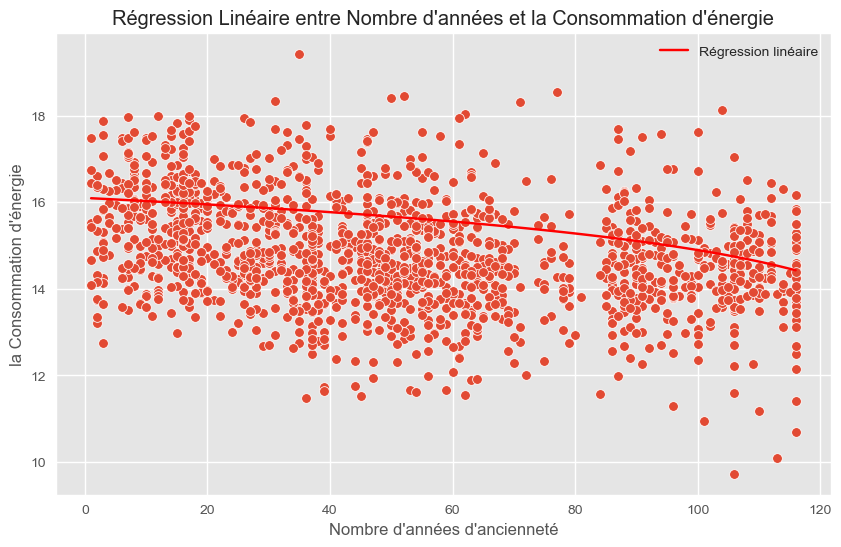

In [688]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Supprimer les lignes avec des valeurs manquantes pour éviter des problèmes de calcul
data_for_regression = fil_data_2[['NombreAnnees', 'SiteEnergyUse(kBtu)']].dropna()

# Régression linéaire
X = data_for_regression[['NombreAnnees']]
y = data_for_regression['SiteEnergyUse(kBtu)']

# Créer le modèle de régression linéaire
model = LinearRegression()

# Adapter le modèle aux données
model.fit(X, y)

# Prédictions
predictions = model.predict(X)

# Représentation graphique en nuage de points avec le logarithme de la consommation d'énergie
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='NombreAnnees', y=np.log1p(data_for_regression['SiteEnergyUse(kBtu)']), data=data_for_regression, ax=ax)
sns.lineplot(x=data_for_regression['NombreAnnees'], y=np.log1p(predictions), color='red', label='Régression linéaire', ax=ax)

ax.set(xlabel='Nombre d\'années d\'ancienneté', ylabel='la Consommation d\'énergie')
plt.title('Régression Linéaire entre Nombre d\'années et la Consommation d\'énergie')
plt.legend()
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px"> A partir de cette regression, on remarque que les vieux batiments ont une tendance, aussi faible soit-elle, à consommer moins d'énergie. </p>

<p style="text-align:justify;font-family:times;font-size:15px"> Faisons un test statistique entre nombre d'année et consommaton d'energie pour avoir plus d'information sur leur liaison.
Pour tester l'hypothèse statistique selon laquelle le nombre d'années est lié à la quantité de consommation d'énergie, on peut faire une analyse de corrélation. Un test couramment utilisé pour évaluer la corrélation entre deux variables continues est le test de corrélation de Pearson.
L'hypothèse nulle \(H0\) est que les deux variables ne sont pas corrélées, tandis que l'hypothèse alternative \(H1\) est que les deux variables sont corrélées..
</p>

In [689]:
from scipy.stats import pearsonr

# Supprimer les lignes avec des valeurs manquantes pour éviter des problèmes de calcul
data_for_correlation = fil_data_2[['NombreAnnees', 'SiteEnergyUse(kBtu)']].dropna()

# Effectuer le test de corrélation de Pearson
correlation_coefficient, p_value = pearsonr(data_for_correlation['NombreAnnees'], np.log1p(data_for_correlation['SiteEnergyUse(kBtu)']))

# Afficher le coefficient de corrélation et la valeur p
print("Valeur p:", p_value)
print("Coefficient de corrélation:", correlation_coefficient)

Valeur p: 4.077479621831163e-33
Coefficient de corrélation: -0.30051418409318176


<p style="text-align:justify;font-family:times;font-size:15px"> Le test de Pearson nous indique une corrélation entre les deux variables; corrélation qui est faible d'après le coefficient de corrélation obtenu.  </p>

C:\Users\DELL\AppData\Local\Temp\ipykernel_21076\1249364681.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


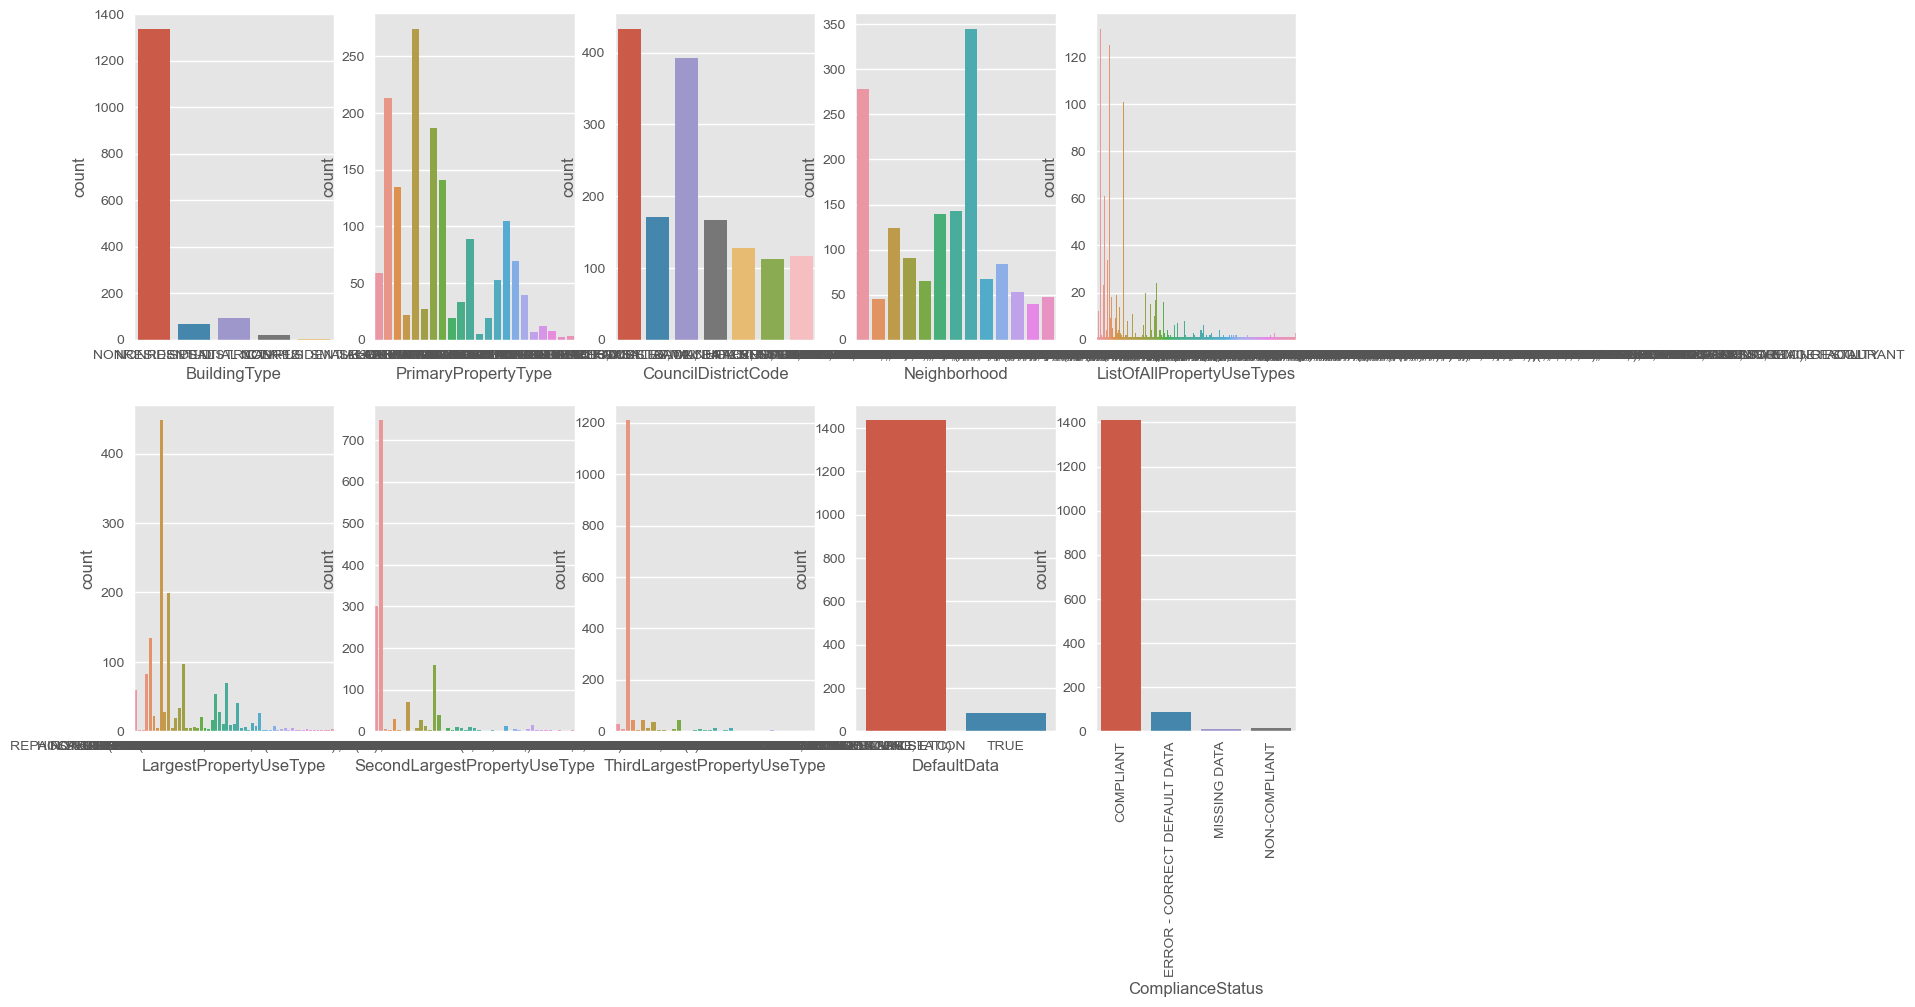

In [690]:
# Définir la taille de la figure en fonction du nombre de colonnes catégorielles
plt.figure(figsize=(15, 5* len(obj_columns)))

# Parcourir les colonnes catégorielles et afficher les histogrammes
for i, column in enumerate(obj_columns, 1):
    plt.subplot(len(obj_columns), 5, i)
    sns.countplot(data=fil_data_2, x=column, orient="v")
    
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Roboto">2. Analyses de liaisons entre quelques variables quantitatives</h4>

<p style="text-align:justify;font-family:times;font-size:15px">- Analyse de la liaison entre SiteEnergyUse et Electricity(kBtu), NaturalGas(kBtu) et SteamUse(kBtu)</p>

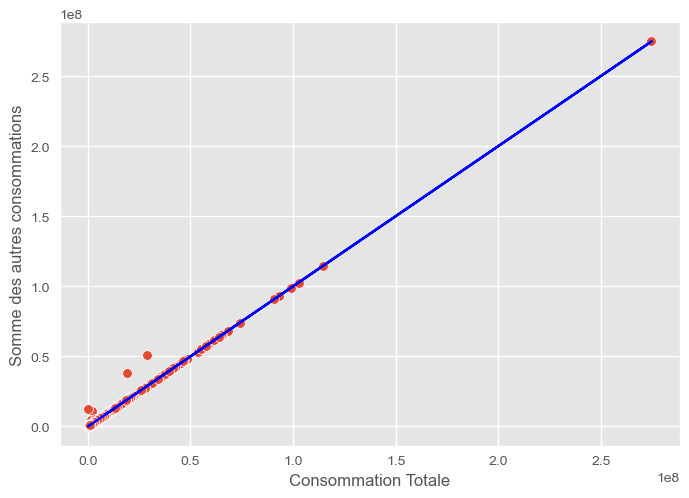

In [691]:
y = fil_data_2['SiteEnergyUse(kBtu)']
x = fil_data_2['Electricity(kBtu)'] + fil_data_2['NaturalGas(kBtu)']+ fil_data_2['SteamUse(kBtu)']

# Tracé
sns.scatterplot(x=x, y=y)
plt.plot(y, y, color='blue', linestyle='-')  # Tracé de la droite y=x en rouge en pointillés
plt.xlabel('Consommation Totale')
plt.ylabel('Somme des autres consommations')
plt.title('')
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px"> Dans le graphique ci dessus, la droite bleue représente la première bissectrice et les points représentent la répartition de la somme des trois types énergies en fonction de la consommation totale. On voit clairement que la somme des trois énergies est presque égale à la consommation totale d'énergie. Elles sont ainsi linéairemnt corrélées à la varibale consommation totale. En d'autre terme, les connaitre suffit déjà pour la prédiction de la consommationt totale. Ainsi pour une bonne performance de notre modèle, nous pourrons envisager de les enlever.  </p>

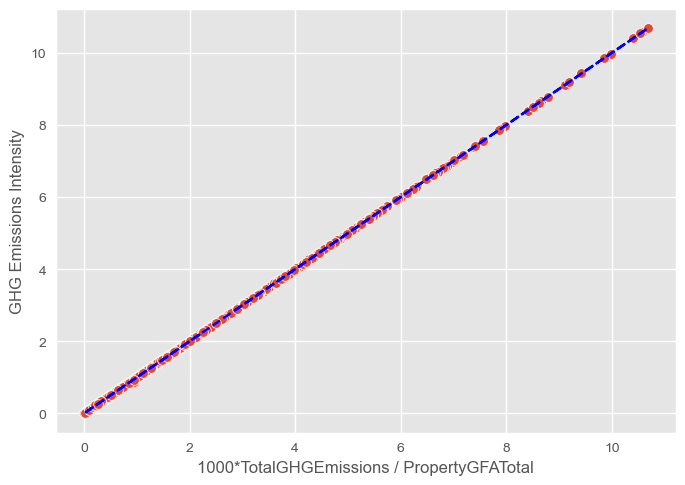

In [692]:
y = fil_data_2['GHGEmissionsIntensity']
x = 1000*fil_data_2['TotalGHGEmissions']/ fil_data_2['PropertyGFATotal']

# Tracé
sns.scatterplot(x=x, y=y)
plt.plot(y, y, color='blue', linestyle='--')  # Tracé de la droite y=x en rouge en pointillés
plt.xlabel('1000*TotalGHGEmissions / PropertyGFATotal')
plt.ylabel('GHG Emissions Intensity')
plt.title('')
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px"> On voit également de façon claire que la variable intensité d'émissions de GHG est fonction de la consommation par surface. Il en de même pour les variables (kBtu/sf) qui peuvent se déduire facilement. Ainsi nous pourront envisager de les enlèverons de notre modèle.  </p>

<p style="text-align:justify;font-family:times;font-size:15px">- Croisement entre la variable dépendante SiteEnergyUse(kBtu) et la variable superficie des batiments</p> 

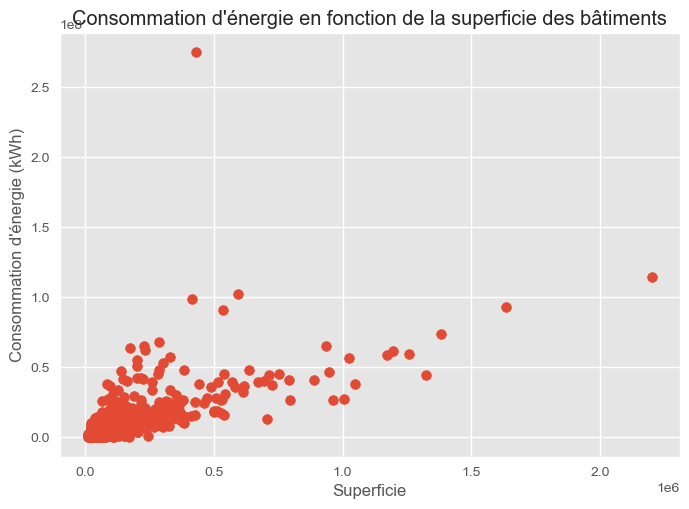

In [693]:
superficie = fil_data_2["PropertyGFABuilding(s)"]
consommation_energie = fil_data_2["SiteEnergyUse(kBtu)"]

# Crée un nuage de points
plt.scatter(superficie, consommation_energie)
plt.title("Consommation d'énergie en fonction de la superficie des bâtiments")
plt.xlabel("Superficie")
plt.ylabel("Consommation d'énergie (kWh)")

# Affiche le nuage de points
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px">Le graphique obtenu ci-dessous n'illustre pas clairement la relation entre les deux variables croisées. Passons à une transformation au logarithme des deux variables.</p>

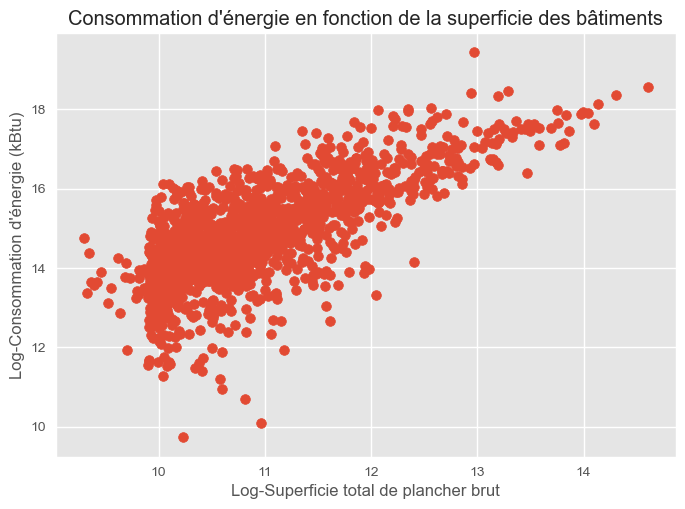

In [694]:
superficie = fil_data_2["PropertyGFABuilding(s)"]
consommation_energie = fil_data_2["SiteEnergyUse(kBtu)"]

# Calcul du logarithme de la consommation d'énergie
log_consommation_energie = np.log(consommation_energie)
# Crée un nuage de points
plt.scatter(np.log(superficie), log_consommation_energie)
plt.title("Consommation d'énergie en fonction de la superficie des bâtiments")
plt.xlabel("Log-Superficie total de plancher brut")
plt.ylabel("Log-Consommation d'énergie (kBtu)")

# Affiche le nuage de points
plt.show()

<p style="text-align:justify;font-family:times;font-size:15px">Ce graphique montre une relation croissante entre le log.consommation d'énergie et le log.superficie de plancher brut du batiment. On peut donc remarquer que l'augmentation d'1% de la superficie de plancher brut du batiment implique une augmentation de la consommation d'énergie.</p>

<p style="text-align:justify;font-family:times;font-size:15px">- Croisement entre la variable dépendante SiteEnergyUse(kBtu) et la variable nombre d'étages </p>

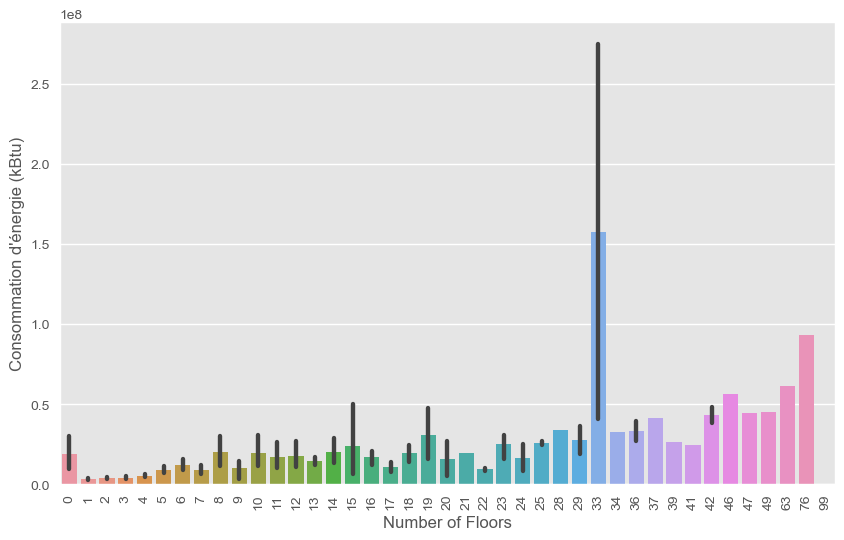

In [695]:
means_by_floor = fil_data_2.groupby('NumberofFloors')['SiteEnergyUse(kBtu)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=fil_data_2['NumberofFloors'], y=fil_data_2['SiteEnergyUse(kBtu)'], data=means_by_floor)
plt.xlabel('Number of Floors')
plt.ylabel('Consommation d\'énergie (kBtu)')
plt.xticks(rotation=90)
plt.show()


<p style="text-align:justify;font-family:times;font-size:15px"> Matrice de correlation</p>

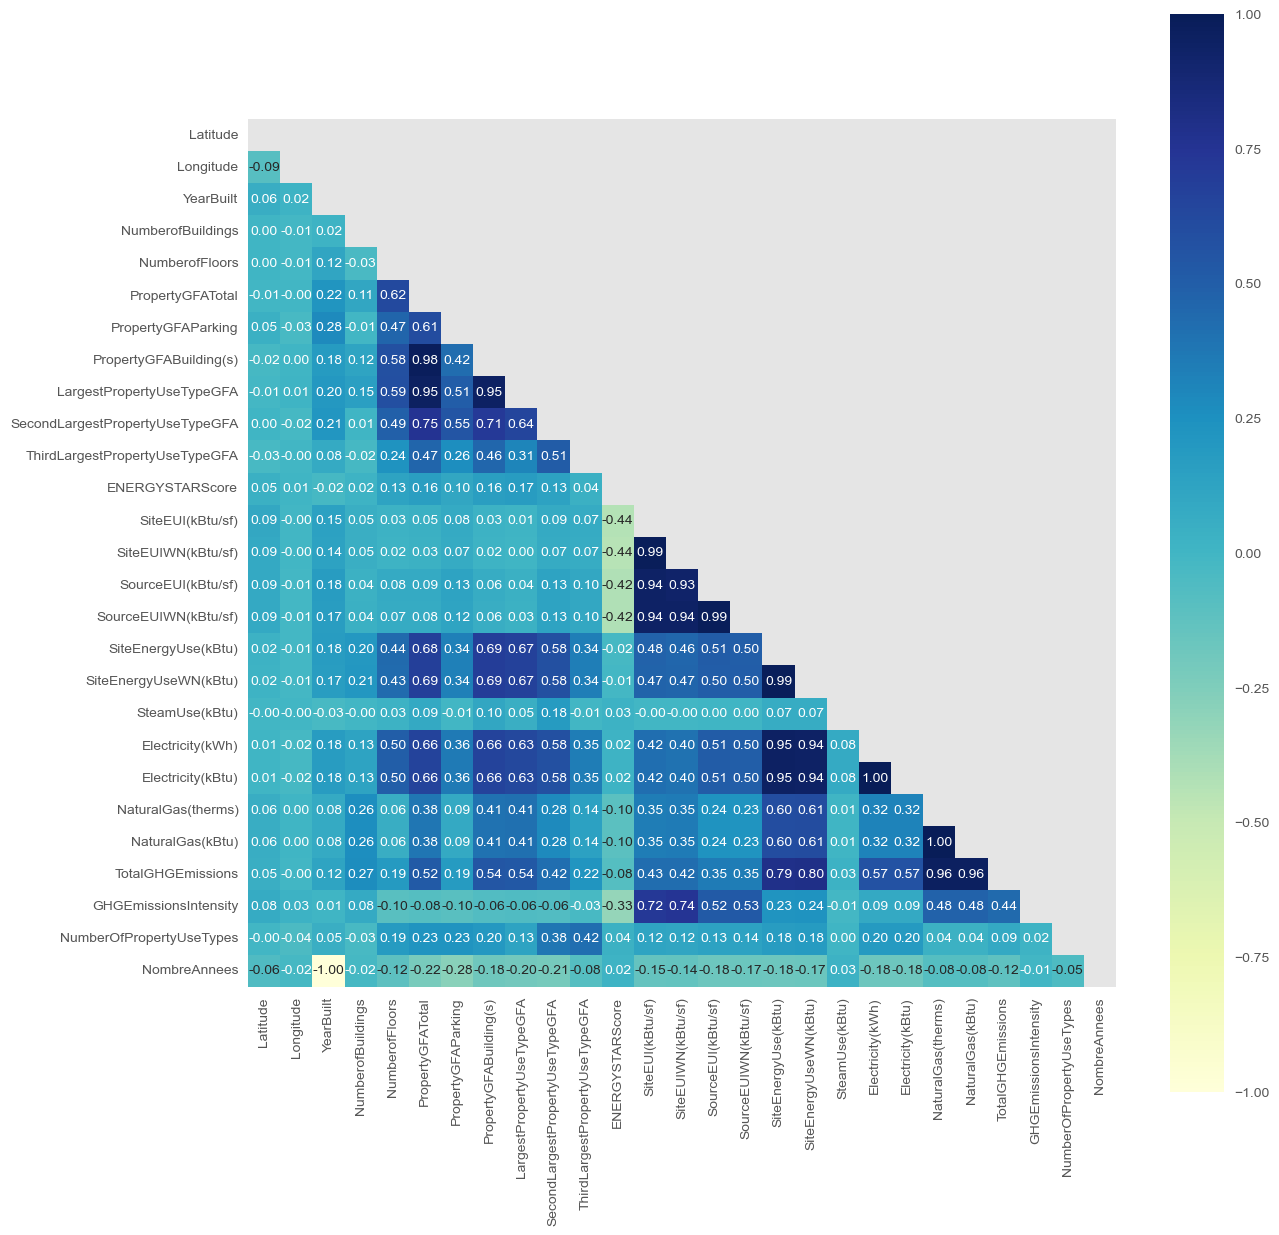

In [696]:
# correlation plot
plt.figure(figsize=(14, 14))
corr =fil_data_2.select_dtypes(include=[int, float]).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap="YlGnBu", annot=True, square=True,
            fmt='.2f',
            mask=mask,
            cbar=True, vmin=-1, vmax=1);

<p style="text-align:justify;font-family:times;font-size:15px">La matrice de correlation montre que : </p>
<p style="text-align:justify;font-family:times;font-size:15px">- Notre varaible consommation SiteEnergyUse(kBtu) est fortement correlée aux variables TotalGHGEmissions, Electricity(kBtu) et SiteEnergyUseWN(kBtu)</p>
<p style="text-align:justify;font-family:times;font-size:15px">- La variable TotalGHGEmissions est fortement correlée aux variables NaturalGas(kbtu),siteEnergyUseWN(kbtu).</p>
<p style="text-align:justify;font-family:times;font-size:15px">- La variable  SourceEUIWN(kBtu/sf) est fortement corrélée à la variable SourceEUI(kBtu/sf)
</p>

In [697]:
var = [
    'SiteEUI(kBtu/sf)', 
    'SiteEUIWN(kBtu/sf)',
    'SourceEUI(kBtu/sf)',
    'SourceEUIWN(kBtu/sf)',
    'GHGEmissionsIntensity',
    'NaturalGas(kBtu)',
    'Electricity(kBtu)',
    'SteamUse(kBtu)',
    'Longitude',
    'Latitude',
    'PropertyGFATotal'
] + [
    'DefaultData', 
    'Electricity(kWh)',
    'NaturalGas(therms)',
    'ComplianceStatus',
    'ListOfAllPropertyUseTypes',
    'PrimaryPropertyType',
    'LargestPropertyUseType',
    'SecondLargestPropertyUseType',
    'ThirdLargestPropertyUseType',
    'SiteEnergyUseWN(kBtu)'
]
var
fil_data_2.drop(var,inplace = True, axis= 1)

In [698]:
fil_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 1 to 3375
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1521 non-null   object 
 1   CouncilDistrictCode              1521 non-null   object 
 2   Neighborhood                     1521 non-null   object 
 3   YearBuilt                        1521 non-null   int64  
 4   NumberofBuildings                1521 non-null   float64
 5   NumberofFloors                   1521 non-null   int64  
 6   PropertyGFAParking               1521 non-null   int64  
 7   PropertyGFABuilding(s)           1521 non-null   int64  
 8   LargestPropertyUseTypeGFA        1521 non-null   float64
 9   SecondLargestPropertyUseTypeGFA  1521 non-null   float64
 10  ThirdLargestPropertyUseTypeGFA   1521 non-null   float64
 11  ENERGYSTARScore                  1008 non-null   float64
 12  SiteEnergyUse(kBtu) 

In [699]:
fil_data_2.to_csv(Path(DATA, "2016_Building_Energy_final.csv"), index=False)